# Load data and check

In [ ]:
import pandas as pd

campaign_desc = pd.read_csv('687 Final Project Dunnhumby/campaign_desc.csv')
campaign_table = pd.read_csv('687 Final Project Dunnhumby/campaign_table.csv')
causal_data = pd.read_csv('687 Final Project Dunnhumby/causal_data.csv')
coupon = pd.read_csv('687 Final Project Dunnhumby/coupon.csv')
coupon_redempt = pd.read_csv('687 Final Project Dunnhumby/coupon_redempt.csv')
hh_demographic = pd.read_csv('687 Final Project Dunnhumby/hh_demographic.csv')
product = pd.read_csv('687 Final Project Dunnhumby/product.csv')
transaction_data = pd.read_csv('687 Final Project Dunnhumby/transaction_data.csv')

In [ ]:
print(transaction_data.columns)
print(transaction_data.shape)

Index(['household_key', 'BASKET_ID', 'DAY', 'PRODUCT_ID', 'QUANTITY',
       'SALES_VALUE', 'STORE_ID', 'RETAIL_DISC', 'TRANS_TIME', 'WEEK_NO',
       'COUPON_DISC', 'COUPON_MATCH_DISC'],
      dtype='object')
(2595732, 12)


In [ ]:
print(hh_demographic.columns)
print(hh_demographic.shape)

Index(['classification_1', 'classification_2', 'classification_3',
       'HOMEOWNER_DESC', 'classification_5', 'classification_4',
       'KID_CATEGORY_DESC', 'household_key'],
      dtype='object')
(801, 8)


In [ ]:
print(campaign_table.columns)
print(campaign_table.shape)

Index(['DESCRIPTION', 'household_key', 'CAMPAIGN'], dtype='object')
(7208, 3)


In [ ]:
print(campaign_desc.columns)
print(campaign_desc.shape)

Index(['DESCRIPTION', 'CAMPAIGN', 'START_DAY', 'END_DAY'], dtype='object')
(30, 4)


In [ ]:
print(product.columns)
print(product.shape)
print(product.head())

Index(['PRODUCT_ID', 'MANUFACTURER', 'DEPARTMENT', 'BRAND', 'COMMODITY_DESC',
       'SUB_COMMODITY_DESC', 'CURR_SIZE_OF_PRODUCT'],
      dtype='object')
(92353, 7)
   PRODUCT_ID  MANUFACTURER    DEPARTMENT     BRAND            COMMODITY_DESC  \
0       25671             2       GROCERY  National                  FRZN ICE   
1       26081             2  MISC. TRANS.  National  NO COMMODITY DESCRIPTION   
2       26093            69        PASTRY   Private                     BREAD   
3       26190            69       GROCERY   Private      FRUIT - SHELF STABLE   
4       26355            69       GROCERY   Private             COOKIES/CONES   

            SUB_COMMODITY_DESC CURR_SIZE_OF_PRODUCT  
0          ICE - CRUSHED/CUBED                22 LB  
1  NO SUBCOMMODITY DESCRIPTION                       
2         BREAD:ITALIAN/FRENCH                       
3                  APPLE SAUCE                50 OZ  
4            SPECIALTY COOKIES                14 OZ  


In [ ]:
print(coupon.columns)
print(coupon.shape)

Index(['COUPON_UPC', 'PRODUCT_ID', 'CAMPAIGN'], dtype='object')
(124548, 3)


In [ ]:
print(coupon_redempt.columns)
print(coupon_redempt.shape)

Index(['household_key', 'DAY', 'COUPON_UPC', 'CAMPAIGN'], dtype='object')
(2318, 4)


In [ ]:
print(causal_data.columns)
print(causal_data.shape)

Index(['PRODUCT_ID', 'STORE_ID', 'WEEK_NO', 'display', 'mailer'], dtype='object')
(36786524, 5)


In [ ]:
def show_distinct_values(df):
    for column in df.columns:
        distinct_values = df[column].unique()
        print(f"Column: {column}")
        print(f"Number of distinct values: {len(distinct_values)}")
        print(f"Distinct values: {distinct_values}")
        print("-" * 50)

# Example usage:
# Replace 'df' with your DataFrame variable
# show_distinct_values(df)

# Household Spends

In [ ]:
import pandas as pd
from scipy.stats import linregress

# Load transaction data
# Replace 'file_path' with your dataset's actual path

# Step 1: Unique number of households
unique_households = transaction_data['household_key'].nunique()
print(f"Unique number of households: {unique_households}")

# Step 2: Spending trends over time

# Group by household_key and week_no to calculate total weekly spending
weekly_spending = transaction_data.groupby(['household_key', 'WEEK_NO'])['SALES_VALUE'].sum().reset_index()

# Analyze spending trend for each household
spending_trends = []
for household, group in weekly_spending.groupby('household_key'):
    # Perform linear regression on week_no vs. sales_value
    slope, _, _, _, _ = linregress(group['WEEK_NO'], group['SALES_VALUE'])
    trend = 'More' if slope > 0 else 'Less'
    spending_trends.append({'household_key': household, 'trend': trend, 'slope': slope})

# Create a DataFrame for spending trends
spending_trends_df = pd.DataFrame(spending_trends)

# Step 3: Count households spending more or less over time
more_spending_count = (spending_trends_df['trend'] == 'More').sum()
less_spending_count = (spending_trends_df['trend'] == 'Less').sum()

print(f"Households spending more over time: {more_spending_count}")
print(f"Households spending less over time: {less_spending_count}")

# Optional: Save the results to a file
spending_trends_df.to_csv('spending_trends.csv', index=False)


Unique number of households: 2500
Households spending more over time: 1351
Households spending less over time: 1149


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


# Find Product

In [ ]:
print(product.columns)
print(product.shape)

Index(['PRODUCT_ID', 'MANUFACTURER', 'DEPARTMENT', 'BRAND', 'COMMODITY_DESC',
       'SUB_COMMODITY_DESC', 'CURR_SIZE_OF_PRODUCT'],
      dtype='object')
(92353, 7)


In [ ]:
show_distinct_values(product)

Column: PRODUCT_ID
Number of distinct values: 92353
Distinct values: [   25671    26081    26093 ... 18293696 18294080 18316298]
--------------------------------------------------
Column: MANUFACTURER
Number of distinct values: 6476
Distinct values: [   2   69   16 ... 2748 4868 2227]
--------------------------------------------------
Column: DEPARTMENT
Number of distinct values: 44
Distinct values: ['GROCERY' 'MISC. TRANS.' 'PASTRY' 'DRUG GM' 'MEAT-PCKGD' 'SEAFOOD-PCKGD'
 'PRODUCE' 'NUTRITION' 'DELI' 'COSMETICS' 'MEAT' 'FLORAL'
 'TRAVEL & LEISUR' 'SEAFOOD' 'MISC SALES TRAN' 'SALAD BAR' 'KIOSK-GAS'
 'ELECT &PLUMBING' 'GRO BAKERY' 'GM MERCH EXP' 'FROZEN GROCERY'
 'COUP/STR & MFG' 'SPIRITS' 'GARDEN CENTER' 'TOYS' 'CHARITABLE CONT'
 'RESTAURANT' 'RX' 'PROD-WHS SALES' 'MEAT-WHSE' 'DAIRY DELI' 'CHEF SHOPPE'
 'HBC' 'DELI/SNACK BAR' 'PORK' 'AUTOMOTIVE' 'VIDEO RENTAL' ' '
 'CNTRL/STORE SUP' 'HOUSEWARES' 'POSTAL CENTER' 'PHOTO' 'VIDEO'
 'PHARMACY SUPPLY']
---------------------------------------

In [ ]:
# Filter rows where "coffee" is present in the COMMODITY_DESC column
# Replace 'product' with the name of your DataFrame
coffee_items = product[product['SUB_COMMODITY_DESC'].str.contains('coffee', case=False, na=False)]

hamburger_buns = product[product['PRODUCT_ID'] == 826249]

print(coffee_items)

       PRODUCT_ID  MANUFACTURER  DEPARTMENT     BRAND       COMMODITY_DESC  \
19          27323            69     GROCERY   Private               COFFEE   
44          27812            69     GROCERY   Private               COFFEE   
217         33441            69      PASTRY   Private     BREAKFAST SWEETS   
255         34444            69     GROCERY   Private  FLUID MILK PRODUCTS   
256         34480           456     GROCERY  National               COFFEE   
...           ...           ...         ...       ...                  ...   
90684    16809433            69     GROCERY   Private               COFFEE   
90728    16809686            69     GROCERY   Private               COFFEE   
91003    17179188          5879  RESTAURANT  National          COFFEE SHOP   
92056    17999221          5423     GROCERY  National  FLUID MILK PRODUCTS   
92071    18005229          5423     GROCERY  National  FLUID MILK PRODUCTS   

                   SUB_COMMODITY_DESC CURR_SIZE_OF_PRODUCT  
19

# Product Sales

     Week  Total Coffee Sales
0       1               43.52
1       2               83.93
2       3               94.95
3       4               91.29
4       5              120.86
..    ...                 ...
97     98              916.06
98     99              828.86
99    100              716.25
100   101              751.60
101   102              506.61

[102 rows x 2 columns]


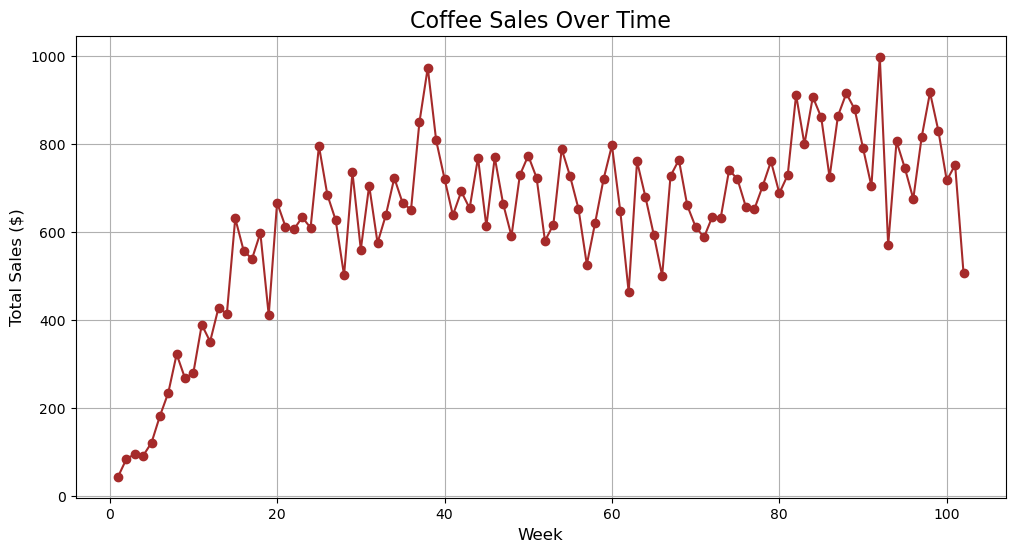

In [ ]:
# Join product to transaction_data on the 'PRODUCT_ID' column
# Replace 'product' and 'transaction_data' with your actual DataFrame names
merged_data = transaction_data.merge(product, on='PRODUCT_ID', how='inner')

# Filter for rows where COMMODITY_DESC is "coffee"
coffee_sales = merged_data[merged_data['COMMODITY_DESC'].str.strip().str.lower() == 'coffee']

# Group by WEEK_NO (or DAY if more granular data is needed) and calculate total sales
coffee_sales_over_time = coffee_sales.groupby('WEEK_NO')['SALES_VALUE'].sum().reset_index()

# Rename columns for better readability
coffee_sales_over_time.rename(columns={'WEEK_NO': 'Week', 'SALES_VALUE': 'Total Coffee Sales'}, inplace=True)

# Display the result
print(coffee_sales_over_time)

# Optional: Plot coffee sales over time
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(coffee_sales_over_time['Week'], coffee_sales_over_time['Total Coffee Sales'], marker='o', linestyle='-', color='brown')
plt.title('Coffee Sales Over Time', fontsize=16)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.grid(True)
plt.show()


  Demographic Group  Total Coffee Sales
3        Age Group4            15320.85
2        Age Group3             9981.11
1        Age Group2             4470.74
4        Age Group5             3482.67
5        Age Group6             2984.41
0        Age Group1             1384.75


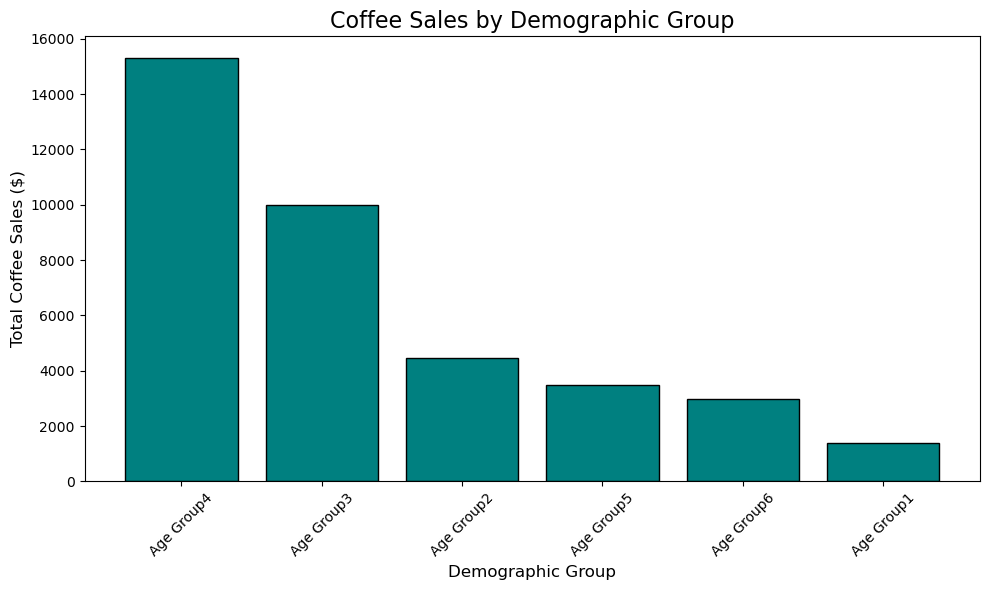

In [ ]:
# Step 1: Join the hh_demographic table to transaction data for coffee buyers
# Merge coffee sales data with demographic data on household_key
coffee_demographics = coffee_sales.merge(hh_demographic, on='household_key', how='inner')

# Step 2: Analyze demographics of coffee buyers
# Group by demographic attributes (replace 'classification_1', 'classification_2' with actual column names)
demographic_analysis = coffee_demographics.groupby('classification_1')['SALES_VALUE'].sum().reset_index()

# Rename columns for clarity
demographic_analysis.rename(columns={'classification_1': 'Demographic Group', 'SALES_VALUE': 'Total Coffee Sales'}, inplace=True)

# Step 3: Sort and Display
demographic_analysis.sort_values(by='Total Coffee Sales', ascending=False, inplace=True)
print(demographic_analysis)

# Step 4: Visualize
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(demographic_analysis['Demographic Group'], demographic_analysis['Total Coffee Sales'], color='teal', edgecolor='black')
plt.title('Coffee Sales by Demographic Group', fontsize=16)
plt.xlabel('Demographic Group', fontsize=12)
plt.ylabel('Total Coffee Sales ($)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   classification_1   801 non-null    object
 1   classification_2   801 non-null    object
 2   classification_3   801 non-null    object
 3   HOMEOWNER_DESC     801 non-null    object
 4   classification_5   801 non-null    object
 5   classification_4   801 non-null    object
 6   KID_CATEGORY_DESC  801 non-null    object
 7   household_key      801 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 50.2+ KB
None

First Few Rows:
  classification_1 classification_2 classification_3 HOMEOWNER_DESC  \
0       Age Group6                X           Level4      Homeowner   
1       Age Group4                X           Level5      Homeowner   
2       Age Group2                Y           Level3        Unknown   
3       Age Group2                Y           Leve

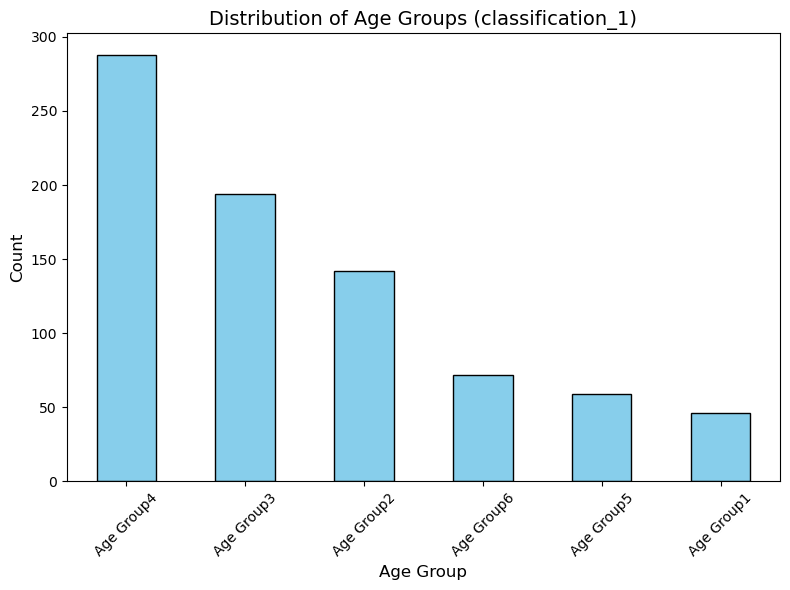

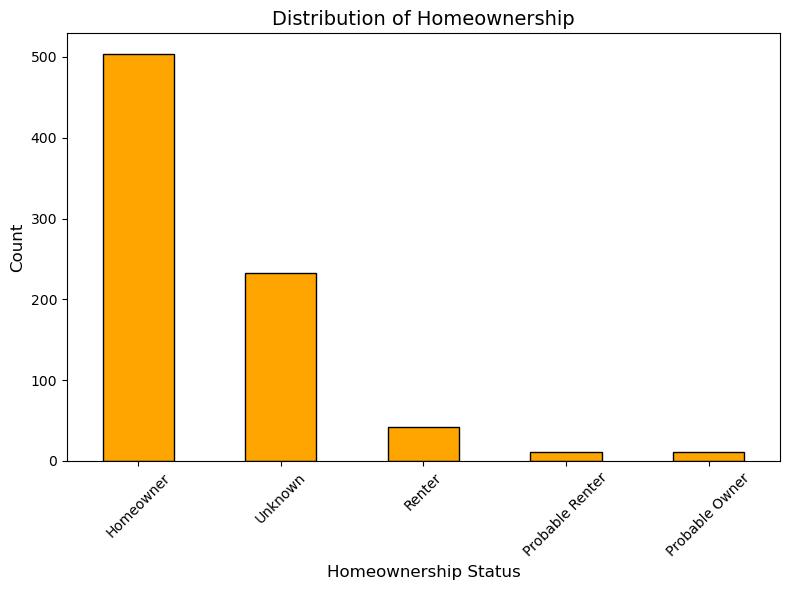

In [ ]:
import pandas as pd

# Display basic information about the dataset
print("Basic Information:")
print(hh_demographic.info())

# Display the first few rows of the dataset
print("\nFirst Few Rows:")
print(hh_demographic.head())

# Check for missing values
print("\nMissing Values:")
print(hh_demographic.isnull().sum())

# Analyze distinct values for each column
print("\nDistinct Values in Each Column:")
for column in hh_demographic.columns:
    print(f"{column}: {hh_demographic[column].nunique()} distinct values")

# Analyze value counts for categorical columns
print("\nValue Counts for Categorical Columns:")
categorical_columns = ['classification_1', 'classification_2', 'classification_3', 'HOMEOWNER_DESC',
                       'classification_5', 'classification_4', 'KID_CATEGORY_DESC']
for column in categorical_columns:
    print(f"\nColumn: {column}")
    print(hh_demographic[column].value_counts())

# Visualize distribution of a few key columns
import matplotlib.pyplot as plt

# Plot distribution of classification_1 (e.g., age groups)
plt.figure(figsize=(8, 6))
hh_demographic['classification_1'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Age Groups (classification_1)', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot distribution of HOMEOWNER_DESC
plt.figure(figsize=(8, 6))
hh_demographic['HOMEOWNER_DESC'].value_counts().plot(kind='bar', color='orange', edgecolor='black')
plt.title('Distribution of Homeownership', fontsize=14)
plt.xlabel('Homeownership Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Find unique MANUFACTURER values
unique_manufacturers = product['MANUFACTURER'].unique()

# Display the unique values and their count
print(f"Number of unique manufacturers: {len(unique_manufacturers)}")
print("Unique manufacturers:")
print(unique_manufacturers)

Number of unique manufacturers: 6476
Unique manufacturers:
[   2   69   16 ... 2748 4868 2227]


In [ ]:
# Find unique MANUFACTURER values
unique_manufacturers = product['MANUFACTURER'].unique()

# Display the unique values and their count
print(f"Number of unique manufacturers: {len(unique_manufacturers)}")
print("Unique manufacturers:")
print(unique_manufacturers)


Number of unique manufacturers: 6476
Unique manufacturers:
[   2   69   16 ... 2748 4868 2227]


In [ ]:
# Find unique MANUFACTURER values
unique_manufacturers = product['MANUFACTURER'].unique()

# Display the unique values and their count
print(f"Number of unique manufacturers: {len(unique_manufacturers)}")
print("Unique manufacturers:")
print(unique_manufacturers)


Number of unique manufacturers: 6476
Unique manufacturers:
[   2   69   16 ... 2748 4868 2227]


In [ ]:
# Add 'Loyalty Card Price' column
transaction_data['Loyalty_Card_Price'] = (
    transaction_data['SALES_VALUE'] +
    (transaction_data['RETAIL_DISC'] + transaction_data['COUPON_MATCH_DISC'])
) / transaction_data['QUANTITY']

# Add 'Non-Loyalty Card Price' column
transaction_data['Non_Loyalty_Card_Price'] = (
    transaction_data['SALES_VALUE'] +
    transaction_data['COUPON_MATCH_DISC']
) / transaction_data['QUANTITY']

# Replace infinities and NaN (e.g., if quantity is 0)
transaction_data.replace([float('inf'), -float('inf')], 0, inplace=True)
transaction_data.fillna(0, inplace=True)

# Display the first few rows to confirm the calculations
print(transaction_data[['SALES_VALUE', 'RETAIL_DISC', 'COUPON_MATCH_DISC', 'QUANTITY',
                        'Loyalty_Card_Price', 'Non_Loyalty_Card_Price']].head())

   SALES_VALUE  RETAIL_DISC  COUPON_MATCH_DISC  QUANTITY  Loyalty_Card_Price  \
0         1.39        -0.60                0.0         1                0.79   
1         0.82         0.00                0.0         1                0.82   
2         0.99        -0.30                0.0         1                0.69   
3         1.21         0.00                0.0         1                1.21   
4         1.50        -0.39                0.0         1                1.11   

   Non_Loyalty_Card_Price  
0                    1.39  
1                    0.82  
2                    0.99  
3                    1.21  
4                    1.50  


In [ ]:
import pandas as pd
import statsmodels.formula.api as smf

product_826249_data=transaction_data[transaction_data['PRODUCT_ID'] == 826249]

# Step 3: Define the formula
# Add relevant features to the formula; adjust based on available columns
# Example: 'SALES_VALUE ~ quantity + price + C(classification_1) + C(classification_2) + C(HOMEOWNER_DESC) + C(campaign)'
formula = 'QUANTITY ~ SALES_VALUE'

# Step 4: Fit the model using smf
model = smf.ols(formula=formula, data=product_826249_data).fit()

# Step 5: Display the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                 8.737e+04
Date:                Sat, 07 Dec 2024   Prob (F-statistic):               0.00
Time:                        15:34:59   Log-Likelihood:                 2011.2
No. Observations:                5505   AIC:                            -4018.
Df Residuals:                    5503   BIC:                            -4005.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0680      0.005     14.869      

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf


# Step 1: Inspect the data
# print(transaction_data.info())

# Step 2: Prepare the data
# Drop rows with missing values to ensure a clean dataset
transaction_data_cleaned = transaction_data.dropna()

# Step 3: Define the formula
# Use all variables except SALES_VALUE as independent variables
independent_vars = transaction_data_cleaned.columns.drop('SALES_VALUE')
formula = 'SALES_VALUE ~ ' + ' + '.join(independent_vars)

# Step 4: Fit the linear regression model
model = smf.ols(formula=formula, data=transaction_data_cleaned).fit()

# Step 5: Display the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            SALES_VALUE   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                 1.287e+06
Date:                Sat, 07 Dec 2024   Prob (F-statistic):               0.00
Time:                        14:13:11   Log-Likelihood:            -4.7919e+06
No. Observations:             2595732   AIC:                         9.584e+06
Df Residuals:                 2595718   BIC:                         9.584e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf

# Step 1: Merge datasets
# Join transaction_data with product on 'PRODUCT_ID'
merged_data = transaction_data.merge(product, on='PRODUCT_ID', how='left')

# Join with coupon on 'household_key' and 'PRODUCT_ID' (if applicable)
merged_data = merged_data.merge(coupon, on=['PRODUCT_ID'], how='left')

# Join with causal_data on 'PRODUCT_ID' and 'WEEK_NO'
merged_data = merged_data.merge(causal_data, on=['PRODUCT_ID'], how='left')

# Step 2: Feature engineering
# Fill missing values in merged_data (e.g., set missing discounts to 0)
merged_data.fillna(0, inplace=True)

# Step 3: Define the formula for regression
# Include relevant variables from merged_data as independent variables
formula = 'SALES_VALUE ~ quantity + coupon_disc + retail_disc + display + mailer + CURR_SIZE_OF_PRODUCT'

# Step 4: Fit the linear regression model
model = smf.ols(formula=formula, data=merged_data).fit()

# Step 5: Display the regression results
print(model.summary())


In [ ]:
import pandas as pd
import statsmodels.formula.api as smf

product_826249_data=transaction_data[transaction_data['PRODUCT_ID'] == 826249]

# Step 1: Merge datasets
# Join transaction_data with product on 'PRODUCT_ID'
merged_data = product_826249_data.merge(product, on='PRODUCT_ID', how='left')

# Join with coupon on 'household_key' and 'PRODUCT_ID' (if applicable)
merged_data = merged_data.merge(coupon, on=['PRODUCT_ID'], how='left')

# Join with causal_data on 'PRODUCT_ID' and 'WEEK_NO'
merged_data = merged_data.merge(causal_data, on=['PRODUCT_ID', 'WEEK_NO'], how='left')

# Step 2: Feature engineering
# Fill missing values in merged_data (e.g., set missing discounts to 0)
merged_data.fillna(0, inplace=True)

print(merged_data.columns)
# Step 3: Define the formula for regression
# Include relevant variables from merged_data as independent variables


In [ ]:
formula = 'SALES_VALUE ~ QUANTITY + COUPON_DISC + RETAIL_DISC +  CURR_SIZE_OF_PRODUCT' #display + mailer +

# Step 4: Fit the linear regression model
model = smf.ols(formula=formula, data=merged_data).fit()

# Step 5: Display the regression results
print(model.summary())


In [ ]:
merged_data.shape

In [ ]:
merged_data.head

In [ ]:
# Join transaction_data with product on 'PRODUCT_ID'
merged_data = transaction_data.merge(product, on='PRODUCT_ID', how='left')

# 1. Filter for All Hamburger Buns
hamburger_buns = merged_data[
    (merged_data['SUB_COMMODITY_DESC'] == 'HAMBURGER BUNS')
]

# 2. Filter for Main Hamburger Bun
main_hamburger_bun = merged_data[
    (merged_data['PRODUCT_ID'] == 826249) &
    (merged_data['SUB_COMMODITY_DESC'] == 'HAMBURGER BUNS')
]

# 3. Filter for Competitor Hamburger Bun Brands
competitor_hamburger_buns = merged_data[
    (merged_data['PRODUCT_ID'] != 826249) &
    (merged_data['SUB_COMMODITY_DESC'] == 'HAMBURGER BUNS')
]

# Display the first few rows of each filtered dataset
print("All Hamburger Buns:")
print(hamburger_buns.describe())

print("\nMain Hamburger Bun:")
print(main_hamburger_bun.describe())

print("\nCompetitor Hamburger Bun Brands:")
print(competitor_hamburger_buns.describe())


In [ ]:
import matplotlib.pyplot as plt

# Group by WEEK_NO and count rows for each dataset
transactions_hamburger_buns = hamburger_buns.groupby('WEEK_NO').size().reset_index(name='row_count')
transactions_main_hamburger_bun = main_hamburger_bun.groupby('WEEK_NO').size().reset_index(name='row_count')
transactions_competitor_hamburger_buns = competitor_hamburger_buns.groupby('WEEK_NO').size().reset_index(name='row_count')

# Plotting the line chart
plt.figure(figsize=(12, 8))

# Plot for all hamburger buns
plt.plot(transactions_hamburger_buns['WEEK_NO'], transactions_hamburger_buns['row_count'], label='All Hamburger Buns', marker='o')

# Plot for main hamburger bun
plt.plot(transactions_main_hamburger_bun['WEEK_NO'], transactions_main_hamburger_bun['row_count'], label='Main Hamburger Bun', marker='o')

# Plot for competitor hamburger buns
plt.plot(transactions_competitor_hamburger_buns['WEEK_NO'], transactions_competitor_hamburger_buns['row_count'], label='Competitor Hamburger Buns', marker='o')

# Customize the chart
plt.title('Number of Rows (Transactions) by WEEK_NO', fontsize=16)
plt.xlabel('WEEK_NO', fontsize=12)
plt.ylabel('Row Count (Transactions)', fontsize=12)
plt.legend(title='Product Category')
plt.grid(alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Step 1: Group data by WEEK_NO and count rows
total_transactions = hamburger_buns.groupby('WEEK_NO').size().reset_index(name='total_rows')
main_transactions = main_hamburger_bun.groupby('WEEK_NO').size().reset_index(name='main_rows')

# Step 2: Merge the datasets to align totals and main transactions by WEEK_NO
market_share_data = pd.merge(total_transactions, main_transactions, on='WEEK_NO', how='left')
market_share_data['main_rows'].fillna(0, inplace=True)  # Fill missing weeks with 0

# Step 3: Calculate the market share percentage
market_share_data['market_share'] = (market_share_data['main_rows'] / market_share_data['total_rows']) * 100

# Step 4: Plot the market share over time
plt.figure(figsize=(12, 8))
plt.plot(market_share_data['WEEK_NO'], market_share_data['market_share'], marker='o', color='blue')

# Customize the chart
plt.title('Market Share of Main Hamburger Bun Over Time', fontsize=16)
plt.xlabel('WEEK_NO', fontsize=12)
plt.ylabel('Market Share (%)', fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()


# Clustering

   classification_1 classification_2  classification_3 HOMEOWNER_DESC  \
0                 6                X                 4      Homeowner   
1                 4                X                 5      Homeowner   
2                 2                Y                 3        Unknown   
3                 2                Y                 6      Homeowner   
4                 4                Z                 5      Homeowner   

   classification_5 classification_4  KID_CATEGORY_DESC  household_key  
0                 5                2                  0              1  
1                 5                2                  0              7  
2                 4                3                  1              8  
3                 4                4                  2             13  
4                 3                1                  0             16  


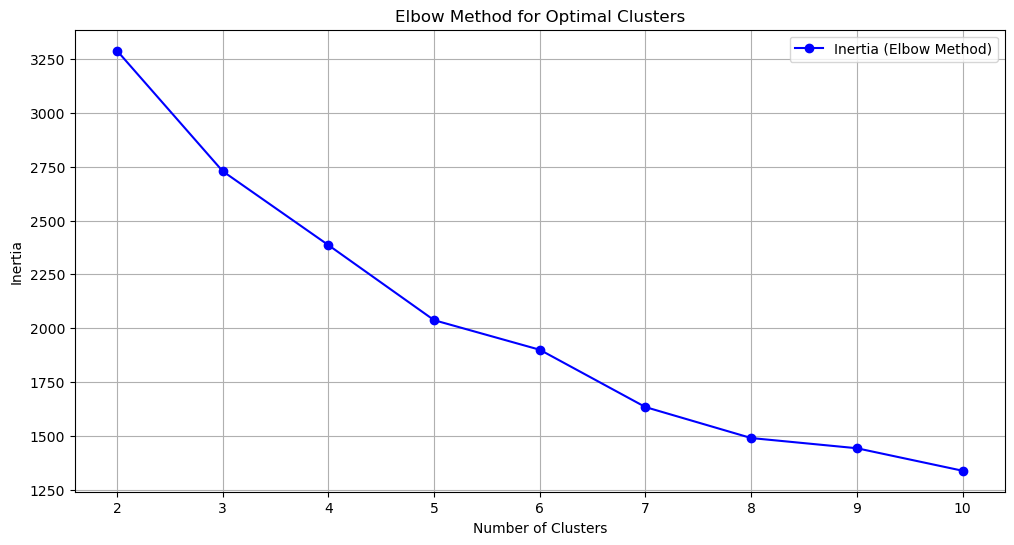

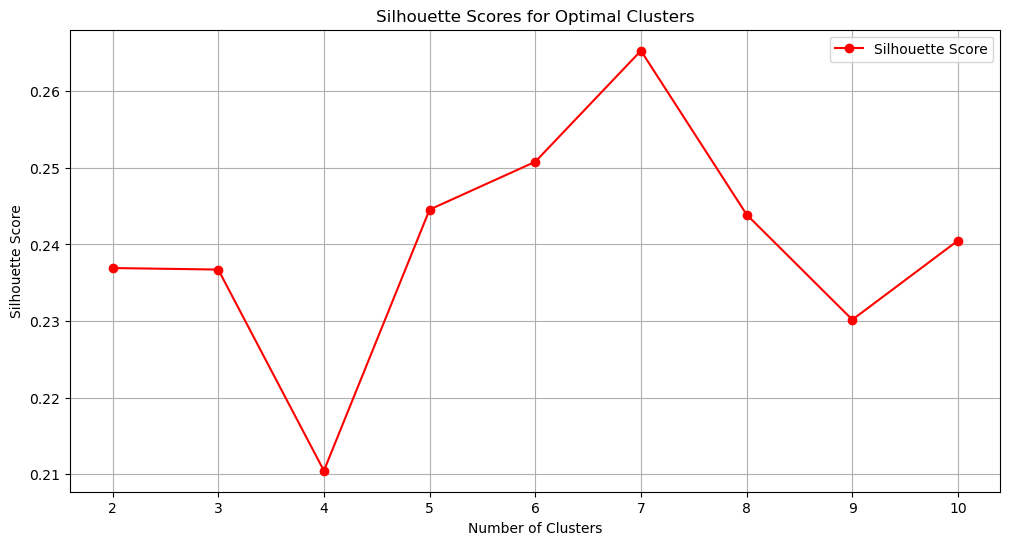

   household_key  cluster
0              1        2
1              7        1
2              8        3
3             13        0
4             16        2


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

transaction_product = transaction_data.merge(product, on='PRODUCT_ID', how='left')

# 1. All MAKEUP_AND_TREATMENT
makeup_and_treatment = transaction_product[
    (transaction_product['DEPARTMENT'] == 'COSMETICS') &
    (transaction_product['COMMODITY_DESC'] == 'MAKEUP AND TREATMENT')
]

# Step 2: Aggregate transaction data to calculate total_times_bought per household
total_bought = makeup_and_treatment.groupby('household_key')['QUANTITY'].sum().reset_index()
total_bought.rename(columns={'QUANTITY': 'total_times_bought'}, inplace=True)

import re

# Function to extract numeric values from strings
def extract_number(value):
    match = re.search(r'\d+', str(value))  # Look for digits in the string
    return int(match.group()) if match else 0  # Return the number if found, otherwise 0

# Columns to transform
columns_to_transform = ['classification_1', 'classification_3', 'classification_5', 'KID_CATEGORY_DESC']

# Apply transformation to columns
for column in columns_to_transform:
    hh_demographic[column] = hh_demographic[column].apply(extract_number)

# Display the transformed DataFrame
print(hh_demographic.head())

# Step 3: Merge hh_demographic with total_bought
merged_data = hh_demographic.merge(total_bought, on='household_key', how='left')
merged_data['total_times_bought']=merged_data['total_times_bought'].fillna(0)  # Fill missing values with 0

# Step 4: Preprocess data for clustering
# Select numerical columns and fill missing values
clustering_data = merged_data.select_dtypes(include=['number']).fillna(0)

clustering_data = clustering_data.drop('household_key', axis=1)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

# Step 5: Create the KElbow curve
inertia = []
silhouette_scores = []
K = range(2, 11)  # Try between 2 and 10 clusters

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

# Plot the KElbow curve
plt.figure(figsize=(12, 6))
plt.plot(K, inertia, 'bo-', label='Inertia (Elbow Method)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.grid()
plt.legend()
plt.show()

# Plot the Silhouette scores
plt.figure(figsize=(12, 6))
plt.plot(K, silhouette_scores, 'ro-', label='Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Optimal Clusters')
plt.grid()
plt.legend()
plt.show()

# Step 6: Fit the final KMeans model with the ideal number of clusters
optimal_clusters = 4  # Replace this with the optimal number determined from the Elbow/Silhouette method
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
merged_data['cluster'] = kmeans.fit_predict(scaled_data)

# Step 7: Save or analyze the clustered data
print(merged_data[['household_key', 'cluster']].head())
merged_data.to_csv('household_clusters.csv', index=False)

In [ ]:
# Step 1: Separate numerical and categorical columns
numerical_columns = merged_data.select_dtypes(include=['number']).columns
categorical_columns = merged_data.select_dtypes(exclude=['number']).columns

# Step 2: Calculate average values for numerical variables by cluster
cluster_averages = merged_data.groupby('cluster')[numerical_columns].mean()

# Step 3: Calculate most frequent values for categorical variables by cluster
cluster_modes = merged_data.groupby('cluster')[categorical_columns].agg(lambda x: x.mode().iloc[0])

# Step 4: Display the results
print("Average values for numerical variables by cluster:")
print(cluster_averages)

print("\nMost frequent values for categorical variables by cluster:")
print(cluster_modes)

# Optional: Save the results to CSV for detailed analysis
cluster_averages.to_csv('cluster_averages.csv', index=True)
cluster_modes.to_csv('cluster_modes.csv', index=True)

Average values for numerical variables by cluster:
         classification_1  classification_3  classification_5  \
cluster                                                         
0                3.047244          5.039370          3.456693   
1                3.607004          6.276265          4.949416   
2                4.786364          3.550000          3.536364   
3                2.152284          3.751269          3.253807   

         KID_CATEGORY_DESC  household_key  total_times_bought  cluster  
cluster                                                                 
0                 2.543307    1165.921260            4.653543      0.0  
1                 0.140078    1311.178988            7.626459      1.0  
2                 0.136364    1171.990909            2.390909      2.0  
3                 0.263959    1251.233503            2.862944      3.0  

Most frequent values for categorical variables by cluster:
        classification_2 HOMEOWNER_DESC classification_4
clu

# Data Split into maybelline and competitors


In [ ]:
# Join transaction_data with product table on 'PRODUCT_ID'
transaction_product = transaction_data.merge(product, on='PRODUCT_ID', how='left')

# 1. All MAKEUP_AND_TREATMENT
makeup_and_treatment = transaction_product[
    (transaction_product['DEPARTMENT'] == 'COSMETICS') &
    (transaction_product['COMMODITY_DESC'] == 'MAKEUP AND TREATMENT')
]

# 2. MAYBELLINE
maybelline = transaction_product[
    (transaction_product['DEPARTMENT'] == 'COSMETICS') &
    (transaction_product['COMMODITY_DESC'] == 'MAKEUP AND TREATMENT') &
    (transaction_product['SUB_COMMODITY_DESC'] == 'MAYBELLINE')
]

# 3. Competitor Makeups
competitor_makeups = transaction_product[
    (transaction_product['DEPARTMENT'] == 'COSMETICS') &
    (transaction_product['COMMODITY_DESC'] == 'MAKEUP AND TREATMENT') &
    (transaction_product['SUB_COMMODITY_DESC'] != 'MAYBELLINE')
]


# Transactions and Market Share

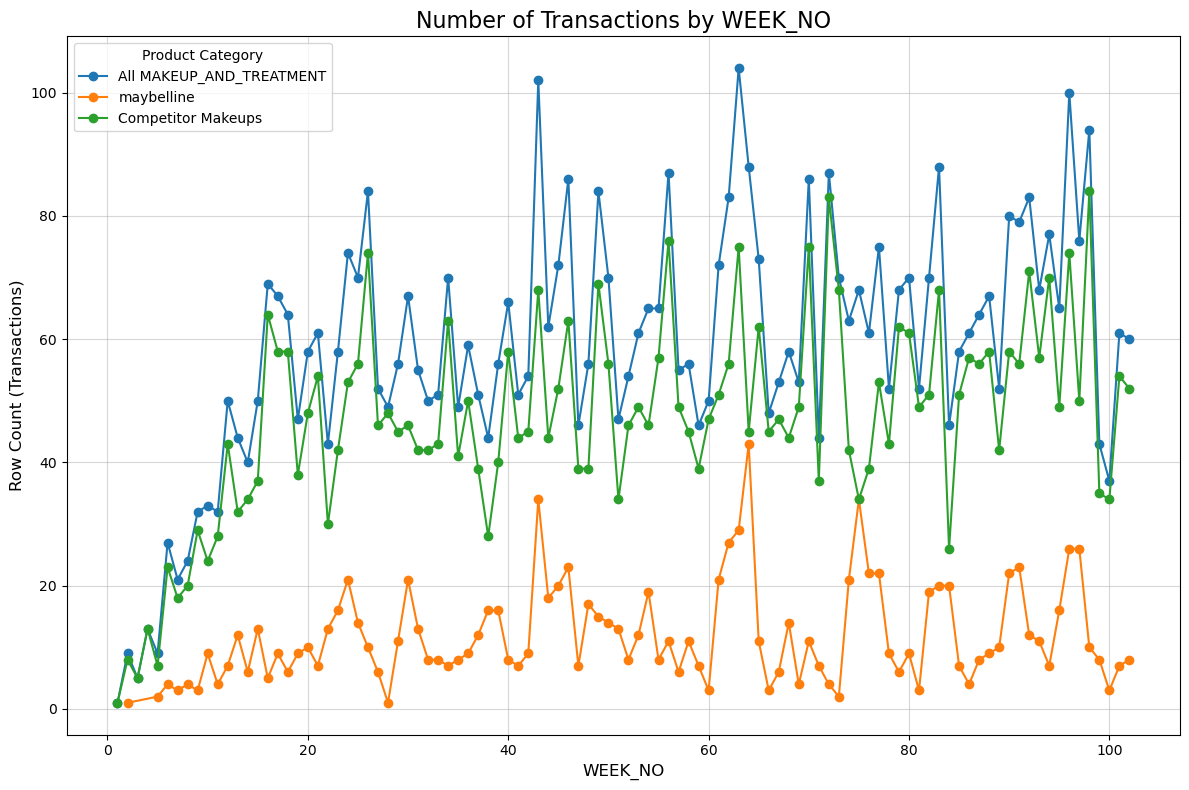

In [ ]:
import matplotlib.pyplot as plt

# Group by WEEK_NO and count rows for each dataset
transactions_makeup_and_treatment = makeup_and_treatment.groupby('WEEK_NO').size().reset_index(name='row_count')
transactions_maybelline = maybelline.groupby('WEEK_NO').size().reset_index(name='row_count')
transactions_competitor_makeups = competitor_makeups.groupby('WEEK_NO').size().reset_index(name='row_count')

# Plotting the line chart
plt.figure(figsize=(12, 8))

# Plot for All MAKEUP_AND_TREATMENT
plt.plot(transactions_makeup_and_treatment['WEEK_NO'], transactions_makeup_and_treatment['row_count'], label='All MAKEUP_AND_TREATMENT', marker='o')

# Plot for COVERGIRL
plt.plot(transactions_maybelline['WEEK_NO'], transactions_maybelline['row_count'], label='maybelline', marker='o')

# Plot for Competitor Makeups
plt.plot(transactions_competitor_makeups['WEEK_NO'], transactions_competitor_makeups['row_count'], label='Competitor Makeups', marker='o')

# Customize the chart
plt.title('Number of Transactions by WEEK_NO', fontsize=16)
plt.xlabel('WEEK_NO', fontsize=12)
plt.ylabel('Row Count (Transactions)', fontsize=12)
plt.legend(title='Product Category')
plt.grid(alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()


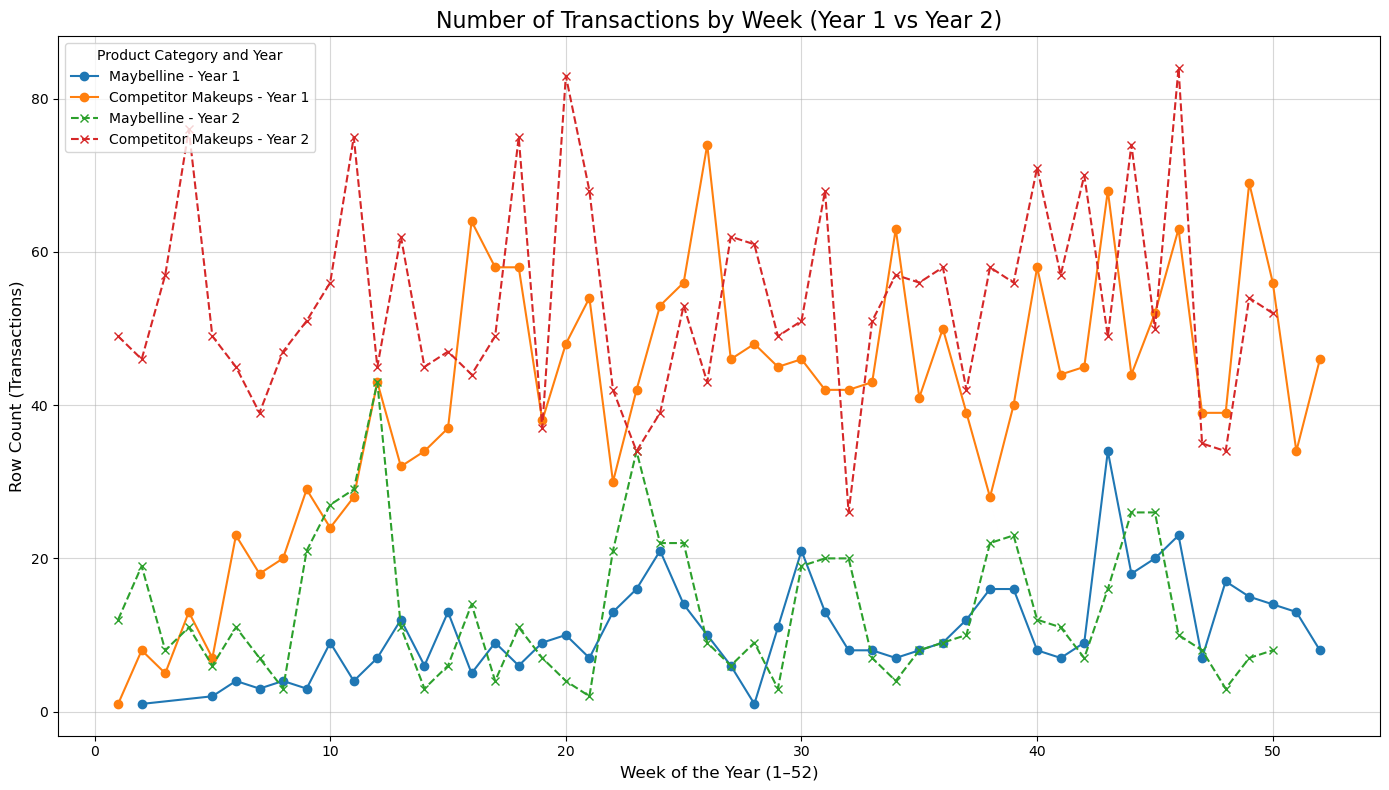

In [ ]:
import matplotlib.pyplot as plt

# Add a column for year (1 for WEEK_NO 1–52, 2 for WEEK_NO 53–104, etc.)
transactions_makeup_and_treatment['year'] = (transactions_makeup_and_treatment['WEEK_NO'] - 1) // 52 + 1
transactions_maybelline['year'] = (transactions_maybelline['WEEK_NO'] - 1) // 52 + 1
transactions_competitor_makeups['year'] = (transactions_competitor_makeups['WEEK_NO'] - 1) // 52 + 1

# Normalize WEEK_NO to weeks within a year (1–52)
transactions_makeup_and_treatment['normalized_week'] = (transactions_makeup_and_treatment['WEEK_NO'] - 1) % 52 + 1
transactions_maybelline['normalized_week'] = (transactions_maybelline['WEEK_NO'] - 1) % 52 + 1
transactions_competitor_makeups['normalized_week'] = (transactions_competitor_makeups['WEEK_NO'] - 1) % 52 + 1

# Separate data for Year 1 and Year 2
makeup_year1 = transactions_makeup_and_treatment[transactions_makeup_and_treatment['year'] == 1]
makeup_year2 = transactions_makeup_and_treatment[transactions_makeup_and_treatment['year'] == 2]

maybelline_year1 = transactions_maybelline[transactions_maybelline['year'] == 1]
maybelline_year2 = transactions_maybelline[transactions_maybelline['year'] == 2]

competitor_year1 = transactions_competitor_makeups[transactions_competitor_makeups['year'] == 1]
competitor_year2 = transactions_competitor_makeups[transactions_competitor_makeups['year'] == 2]

# Plotting the line chart
plt.figure(figsize=(14, 8))

# Plot for Year 1
#plt.plot(makeup_year1['normalized_week'], makeup_year1['row_count'], label='All MAKEUP_AND_TREATMENT - Year 1', marker='o', linestyle='-')
plt.plot(maybelline_year1['normalized_week'], maybelline_year1['row_count'], label='Maybelline - Year 1', marker='o', linestyle='-')
plt.plot(competitor_year1['normalized_week'], competitor_year1['row_count'], label='Competitor Makeups - Year 1', marker='o', linestyle='-')

# Plot for Year 2
#plt.plot(makeup_year2['normalized_week'], makeup_year2['row_count'], label='All MAKEUP_AND_TREATMENT - Year 2', marker='x', linestyle='--')
plt.plot(maybelline_year2['normalized_week'], maybelline_year2['row_count'], label='Maybelline - Year 2', marker='x', linestyle='--')
plt.plot(competitor_year2['normalized_week'], competitor_year2['row_count'], label='Competitor Makeups - Year 2', marker='x', linestyle='--')

# Customize the chart
plt.title('Number of Transactions by Week (Year 1 vs Year 2)', fontsize=16)
plt.xlabel('Week of the Year (1–52)', fontsize=12)
plt.ylabel('Row Count (Transactions)', fontsize=12)
plt.legend(title='Product Category and Year')
plt.grid(alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()


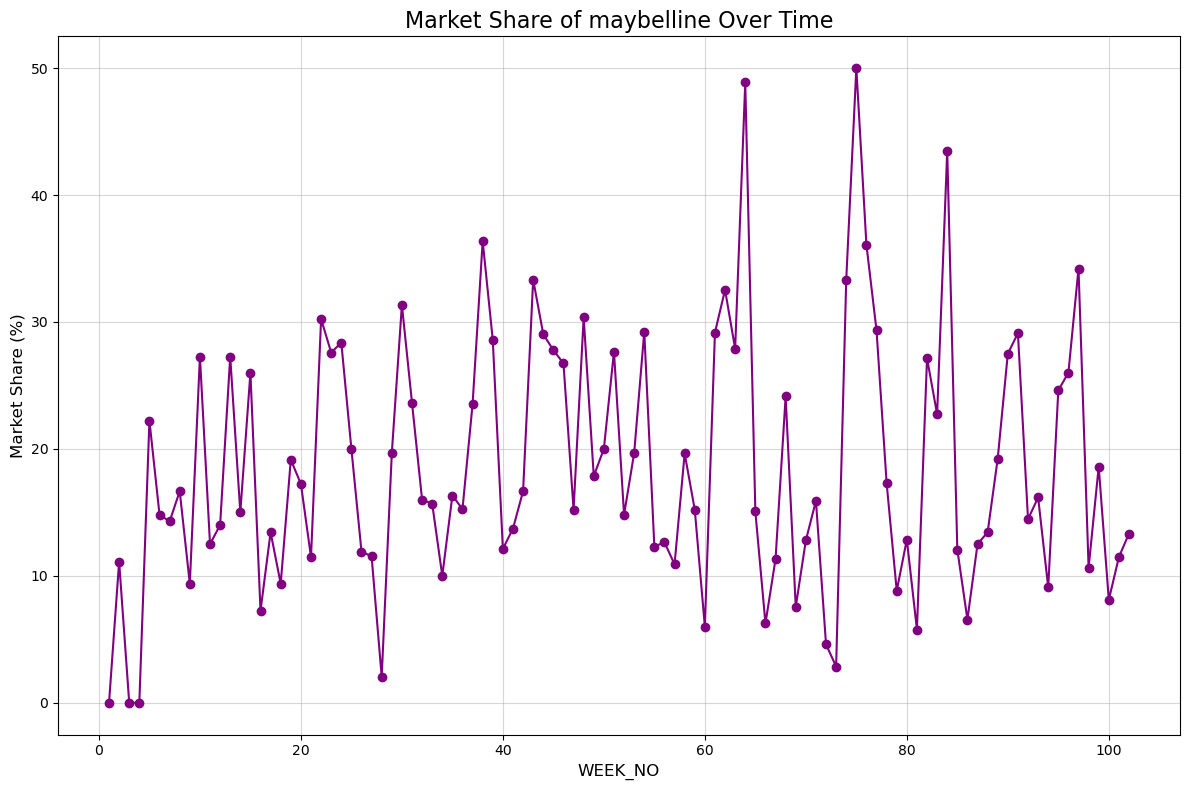

In [ ]:
# Calculate the total transactions for all makeup and treatment by WEEK_NO
total_transactions = makeup_and_treatment.groupby('WEEK_NO').size().reset_index(name='total_rows')

# Calculate the maybelline transactions by WEEK_NO
maybelline_transactions = maybelline.groupby('WEEK_NO').size().reset_index(name='maybelline_rows')

# Merge the datasets to align totals and COVERGIRL transactions by WEEK_NO
market_share_data = pd.merge(total_transactions, maybelline_transactions, on='WEEK_NO', how='left')
market_share_data['maybelline_rows']=market_share_data['maybelline_rows'].fillna(0)  # Fill missing weeks with 0

# Calculate the market share percentage
market_share_data['market_share'] = (market_share_data['maybelline_rows'] / market_share_data['total_rows']) * 100

# Plot the market share over time
plt.figure(figsize=(12, 8))
plt.plot(market_share_data['WEEK_NO'], market_share_data['market_share'], marker='o', color='purple')

# Customize the chart
plt.title('Market Share of maybelline Over Time', fontsize=16)
plt.xlabel('WEEK_NO', fontsize=12)
plt.ylabel('Market Share (%)', fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Step 2: Calculate total sales for each product
product_sales = makeup_and_treatment.groupby('SUB_COMMODITY_DESC')['SALES_VALUE'].sum().reset_index()
product_sales.rename(columns={'SALES_VALUE': 'total_sales'}, inplace=True)

# Step 3: Calculate the total sales for the entire category
total_category_sales = product_sales['total_sales'].sum()

# Step 4: Calculate market share for each product
product_sales['market_share'] = product_sales['total_sales'] / total_category_sales

# Step 5: Calculate HHI (sum of squared market shares)
product_sales['market_share_squared'] = product_sales['market_share'] ** 2
hhi_index = product_sales['market_share_squared'].sum()

# Display the results
print("HHI Index for Makeup and Treatment Category:", hhi_index)
print("\nProduct-wise Market Shares:")
print(product_sales[['SUB_COMMODITY_DESC', 'market_share', 'market_share_squared']])

# Optional: Save the market share data to a CSV
# product_sales.to_csv('makeup_and_treatment_market_share.csv', index=False)


HHI Index for Makeup and Treatment Category: 0.1435750019124386

Product-wise Market Shares:
                SUB_COMMODITY_DESC  market_share  market_share_squared
0                 ACNE MEDICATIONS      0.005367          2.880988e-05
1                    ALL UNDERWEAR      0.000319          1.017364e-07
2                            ALMAY      0.061268          3.753799e-03
3                      APPLICATORS      0.021555          4.646360e-04
4    ASEPTIC PACK JUICE AND DRINKS      0.000265          7.019886e-08
5                  BANDANA/SCARVES      0.002294          5.262303e-06
6                       BASIC CALC      0.000067          4.515108e-09
7                  BASIC OPENSTOCK      0.000169          2.864970e-08
8       BATH TOWELS WASH CLOTHS HT      0.001379          1.902164e-06
9                       BONNE BELL      0.013256          1.757226e-04
10     BROOMS: PLSTC/NATRL & PATIO      0.000127          1.616949e-08
11                 CHOCOLATE SYRUP      0.000267       

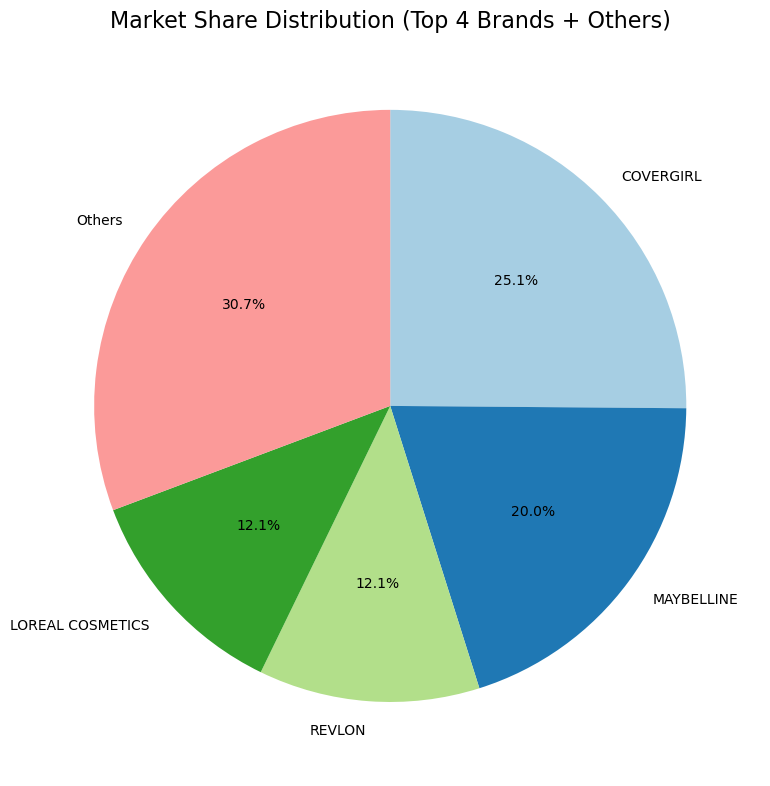

In [ ]:
import matplotlib.pyplot as plt

# Step 2: Calculate total sales for each product
product_sales = makeup_and_treatment.groupby('SUB_COMMODITY_DESC')['SALES_VALUE'].sum().reset_index()
product_sales.rename(columns={'SALES_VALUE': 'total_sales'}, inplace=True)

# Step 3: Calculate the total sales for the entire category
total_category_sales = product_sales['total_sales'].sum()

# Step 4: Calculate market share for each product
product_sales['market_share'] = product_sales['total_sales'] / total_category_sales

# Step 5: Identify top 4 brands and group the rest as "Others"
product_sales = product_sales.sort_values(by='market_share', ascending=False)
top_4_brands = product_sales[:4]
others = pd.DataFrame({
    'SUB_COMMODITY_DESC': ['Others'],
    'total_sales': [product_sales[4:]['total_sales'].sum()],
    'market_share': [product_sales[4:]['market_share'].sum()]
})

# Combine top 4 brands with "Others"
combined_data = pd.concat([top_4_brands, others], ignore_index=True)

# Reorder to make Maybelline second and Others last
desired_order = ['COVERGIRL', 'MAYBELLINE', 'REVLON', 'LOREAL COSMETICS', 'Others']
combined_data = combined_data.set_index('SUB_COMMODITY_DESC').reindex(desired_order).reset_index()

# Step 6: Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    combined_data['market_share'],
    labels=combined_data['SUB_COMMODITY_DESC'],
    autopct='%1.1f%%',
    startangle=90,  # First slice starts at 0 degrees
    counterclock=False,  # First slice starts at 0 degrees
    colors=plt.cm.Paired.colors
)

# Customize the chart
plt.title('Market Share Distribution (Top 4 Brands + Others)', fontsize=16)
plt.tight_layout()

# Show the pie chart
plt.show()


# Logistic Regression to understand sales

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np

# Step 2: Prepare campaign-related features
# Join campaign_table with campaign_desc on 'CAMPAIGN'
campaign_info = campaign_table.merge(campaign_desc, on='CAMPAIGN', how='left')

# Filter transactions for active campaigns
campaign_info['START_DAY']=campaign_info['START_DAY'].fillna(0)
campaign_info['END_DAY']=campaign_info['END_DAY'].fillna(0)

makeup_products = product[
    (product['DEPARTMENT'] == 'COSMETICS') &
    (product['COMMODITY_DESC'] == 'MAKEUP AND TREATMENT')
]

# Step 1: Join coupon table to product table on 'PRODUCT_ID'
coupon_product = coupon.merge(makeup_products, on='PRODUCT_ID', how='inner')

# Standardize COUPON_UPC column in both tables
coupon_redempt['COUPON_UPC'] = coupon_redempt['COUPON_UPC'].astype(str).str.strip()
coupon_product['COUPON_UPC'] = coupon_product['COUPON_UPC'].astype(str).str.strip()

# Re-run the join
coupon_info = coupon_redempt.merge(coupon_product, on='COUPON_UPC', how='left')

# Join coupon_info and campaign_info
# Assuming both tables have 'household_key', 'PRODUCT_ID', and 'WEEK_NO' as common keys
coupon_campaign_info = campaign_info.merge(
    coupon_info,
    left_on=['CAMPAIGN'],
    right_on=['CAMPAIGN_x'], # Adjust the keys based on your data
    how='left'
)

# Display the first few rows to verify the join
print(coupon_campaign_info)
print(coupon_campaign_info.info())
print(coupon_campaign_info.shape)

coupon_campaign_info.to_csv('coupon_campaign_info.csv', index=False)

         DESCRIPTION_x  household_key_x  CAMPAIGN DESCRIPTION_y  START_DAY  \
0                TypeA               17        26         TypeA        224   
1                TypeA               17        26         TypeA        224   
2                TypeA               17        26         TypeA        224   
3                TypeA               17        26         TypeA        224   
4                TypeA               17        26         TypeA        224   
...                ...              ...       ...           ...        ...   
85216673         TypeC              942        15         TypeC        547   
85216674         TypeC              855        15         TypeC        547   
85216675         TypeC              855        15         TypeC        547   
85216676         TypeC              334        15         TypeC        547   
85216677         TypeC              334        15         TypeC        547   

          END_DAY  household_key_y  DAY   COUPON_UPC  CAMPAIGN_

In [ ]:
campaign_transactions = transaction_data.merge(campaign_info, on='household_key', how='left')
campaign_transactions['is_campaign_active'] = (
    (campaign_transactions['WEEK_NO'] >= np.floor(campaign_transactions['START_DAY']/7)) &
    (campaign_transactions['WEEK_NO'] <= np.ceil(campaign_transactions['END_DAY']/7))
).astype(int)


# Join coupon info to transaction_data
coupon_transactions = transaction_data.merge(coupon_info, on=['household_key', 'PRODUCT_ID'], how='left')
coupon_transactions['is_coupon_active'] = coupon_transactions['WEEK_NO'].notna().astype(int)

# Step 4: Prepare causal-related features
# Left join causal_data to transaction_data on 'WEEK_NO', 'STORE_NO', and 'PRODUCT_ID'
causal_transactions = transaction_data.merge(causal_data, on=['WEEK_NO', 'STORE_ID', 'PRODUCT_ID'], how='left')
causal_transactions['display'].fillna(0, inplace=True)
causal_transactions['mailer'].fillna(0, inplace=True)

# Step 5: Combine all prepared features
# Merge campaign, coupon, and causal data with transaction_data
final_data = transaction_data.copy()
final_data = final_data.merge(campaign_transactions[['transaction_id', 'is_campaign_active']], on='transaction_id', how='left')
final_data = final_data.merge(coupon_transactions[['transaction_id', 'is_coupon_active']], on='transaction_id', how='left')
final_data = final_data.merge(causal_transactions[['transaction_id', 'display', 'mailer']], on='transaction_id', how='left')

# Fill missing values in the final dataset
final_data.fillna(0, inplace=True)

# Step 6: Aggregate data to weekly level
weekly_data = final_data.groupby('WEEK_NO').agg({
    'is_campaign_active': 'sum',
    'is_coupon_active': 'sum',
    'display': 'sum',
    'mailer': 'sum',
    'basket_id': 'count'  # Count of transactions as the dependent variable
}).reset_index()

# Rename columns
weekly_data.rename(columns={'basket_id': 'weekly_transactions'}, inplace=True)

# Step 7: Run regression to understand factors affecting weekly transactions
formula = 'weekly_transactions ~ is_campaign_active + is_coupon_active + display + mailer'
model = smf.ols(formula=formula, data=weekly_data).fit()

# Display regression results
print(model.summary())

/var/folders/fb/ly6l5n852t73j09dv1k9ndx80000gp/T/ipykernel_97783/3852191845.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  causal_transactions['display'].fillna(0, inplace=True)
/var/folders/fb/ly6l5n852t73j09dv1k9ndx80000gp/T/ipykernel_97783/3852191845.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting val

KeyError: "['transaction_id'] not in index"

In [ ]:
import pandas as pd
import numpy as np

# Convert START_DAY and END_DAY to weekly values
coupon_campaign_info['START_WEEK'] = np.floor(coupon_campaign_info['START_DAY'] / 7).astype(int)
coupon_campaign_info['END_WEEK'] = np.ceil(coupon_campaign_info['END_DAY'] / 7).astype(int)

# Step 2: Perform the join with transaction_data
# Add household_key to the join condition if needed
transaction_campaign = transaction_data.merge(
    coupon_campaign_info,
    how='left',
    on='household_key'  # This assumes household_key exists in both tables; adjust as needed
)

# Step 3: Apply the WEEK_NO condition
transaction_campaign = transaction_campaign[
    (transaction_campaign['WEEK_NO'] >= transaction_campaign['START_WEEK']) &
    (transaction_campaign['WEEK_NO'] <= transaction_campaign['END_WEEK'])
]

# Display the first few rows of the resulting DataFrame
print(transaction_campaign.head())

# Optional: Save the resulting DataFrame for further analysis
# transaction_campaign.to_csv('transaction_campaign_joined.csv', index=False)

# Regression on Causal Data

In [ ]:
causal_transactions = makeup_and_treatment.merge(causal_data, on=['WEEK_NO', 'STORE_ID', 'PRODUCT_ID'], how='left')

In [ ]:
grouped_data = makeup_and_treatment.groupby(['PRODUCT_ID', 'STORE_ID', 'WEEK_NO']).agg(
    transaction_count=('QUANTITY', 'sum')  # Count of rows (transactions)
).reset_index()

# Display the first few rows of the grouped DataFrame
print(grouped_data.columns)

# Optional: Save the grouped DataFrame to a CSV file
# grouped_data.to_csv('grouped_transaction_data.csv', index=False)

Index(['PRODUCT_ID', 'STORE_ID', 'WEEK_NO', 'transaction_count'], dtype='object')


In [ ]:
# Join grouped_data with causal_data on PRODUCT_ID, STORE_ID, and WEEK_NO
merged_data = grouped_data.merge(causal_data, on=['PRODUCT_ID', 'STORE_ID', 'WEEK_NO'], how='inner')
# [['PRODUCT_ID', 'STORE_ID', 'WEEK_NO', 'display']]

In [ ]:
print(merged_data['mailer'].value_counts)
merged_data.to_csv('grouped_transaction_data.csv', index=False)

<bound method IndexOpsMixin.value_counts of 0      A
1      A
2      A
3      A
4      A
      ..
915    0
916    0
917    A
918    A
919    A
Name: mailer, Length: 920, dtype: object>


In [ ]:
import statsmodels.formula.api as smf

# Ensure the data is clean
#merged_data['transaction_count']=merged_data['transaction_count'].fillna(0)  # Fill missing transaction counts
#merged_data['display']=merged_data['display'].fillna(0)
merged_data['mailer']=merged_data['mailer'].fillna(0)# Fill missing mailer data
merged_data['display'].fillna(0, inplace=True)  # Fill missing display data

# Run the regression
formula = 'transaction_count ~ mailer + display'
model = smf.ols(formula=formula, data=merged_data).fit()

# Print the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      transaction_count   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.4407
Date:                Sun, 08 Dec 2024   Prob (F-statistic):              0.927
Time:                        19:15:19   Log-Likelihood:                -3.9934
No. Observations:                 920   AIC:                             29.99
Df Residuals:                     909   BIC:                             83.05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.9257      0.108      8.579   

/var/folders/fb/ly6l5n852t73j09dv1k9ndx80000gp/T/ipykernel_97783/650506704.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['display'].fillna(0, inplace=True)  # Fill missing display data


In [ ]:
import pandas as pd
import statsmodels.formula.api as smf

# Step 2: Prepare campaign-related features
# Join campaign_table with campaign_desc on 'CAMPAIGN'
campaign_info = campaign_table.merge(campaign_desc, on='CAMPAIGN', how='left')

# Filter transactions for active campaigns
campaign_info['START_DAY'].fillna(0, inplace=True)
campaign_info['END_DAY'].fillna(0, inplace=True)
campaign_transactions = transaction_data.merge(campaign_info, on='household_key', how='left')
campaign_transactions['is_campaign_active'] = (
    (campaign_transactions['WEEK_NO'] >= campaign_transactions['START_DAY']) &
    (campaign_transactions['WEEK_NO'] <= campaign_transactions['END_DAY'])
).astype(int)

# Step 3: Prepare coupon-related features
# Join coupon_redempt to coupon
coupon_info = coupon_redempt.merge(coupon, on='COUPON_UPC', how='left')

# Join coupon info to transaction_data
coupon_transactions = transaction_data.merge(coupon_info, on=['household_key', 'PRODUCT_ID'], how='left')
coupon_transactions['is_coupon_active'] = coupon_transactions['WEEK_NO'].notna().astype(int)

# Step 4: Prepare causal-related features
# Left join causal_data to transaction_data on 'WEEK_NO', 'STORE_NO', and 'PRODUCT_ID'
causal_transactions = transaction_data.merge(causal_data, on=['WEEK_NO', 'STORE_ID', 'PRODUCT_ID'], how='left')
causal_transactions['display'].fillna(0, inplace=True)
causal_transactions['mailer'].fillna(0, inplace=True)

# Step 5: Combine all prepared features
# Merge campaign, coupon, and causal data with transaction_data
final_data = transaction_data.copy()
final_data = final_data.merge(campaign_transactions[['transaction_id', 'is_campaign_active']], on='transaction_id', how='left')
final_data = final_data.merge(coupon_transactions[['transaction_id', 'is_coupon_active']], on='transaction_id', how='left')
final_data = final_data.merge(causal_transactions[['transaction_id', 'display', 'mailer']], on='transaction_id', how='left')

# Fill missing values in the final dataset
final_data.fillna(0, inplace=True)

# Step 6: Aggregate data to weekly level
weekly_data = final_data.groupby('WEEK_NO').agg({
    'is_campaign_active': 'sum',
    'is_coupon_active': 'sum',
    'display': 'sum',
    'mailer': 'sum',
    'basket_id': 'count'  # Count of transactions as the dependent variable
}).reset_index()

# Rename columns
weekly_data.rename(columns={'basket_id': 'weekly_transactions'}, inplace=True)

# Step 7: Run regression to understand factors affecting weekly transactions
formula = 'weekly_transactions ~ is_campaign_active + is_coupon_active + display + mailer'
model = smf.ols(formula=formula, data=weekly_data).fit()

# Display regression results
print(model.summary())


/var/folders/fb/ly6l5n852t73j09dv1k9ndx80000gp/T/ipykernel_97783/3660344112.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  campaign_info['START_DAY'].fillna(0, inplace=True)
/var/folders/fb/ly6l5n852t73j09dv1k9ndx80000gp/T/ipykernel_97783/3660344112.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

KeyError: "['transaction_id'] not in index"

# Transaction with Causal for Makeup products

In [ ]:
# Step 1: Filter product_data for the specified department and commodity
filtered_products = product[
    (product['DEPARTMENT'] == 'GROCERY') &
    (product['COMMODITY_DESC'] == 'ICE CREAM/MILK/SHERBTS')
]

# Step 2: Join causal_data to filtered_products on PRODUCT_ID
filtered_causal_data = causal_data.merge(filtered_products, on='PRODUCT_ID', how='inner')

# Step 3: Join the resulting data to transaction_data on PRODUCT_ID
final_data = transaction_data.merge(filtered_causal_data, on=['PRODUCT_ID', 'STORE_ID', 'WEEK_NO'], how='inner')

# Display the first few rows of the final joined data
final_data.to_csv('final_data.csv', index=False)

# Timeline of Campaign, Display and Mailer

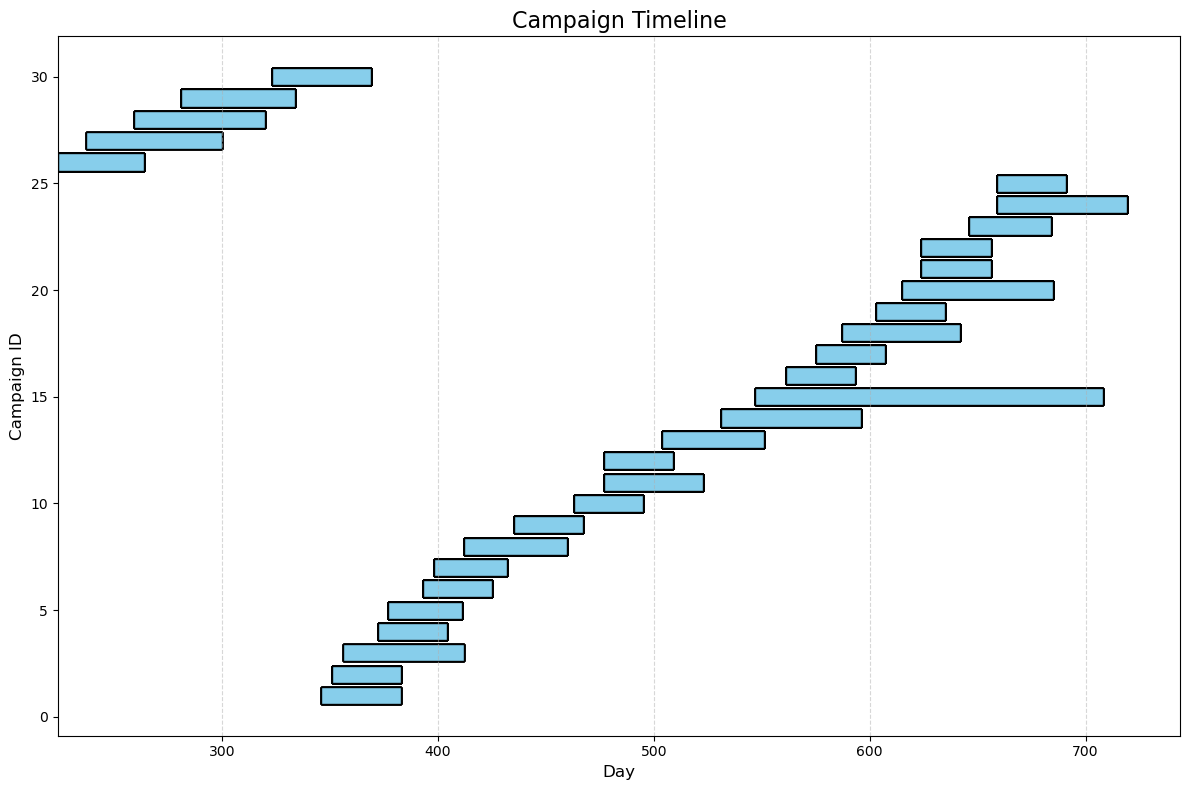

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Convert START_DAY and END_DAY to week numbers
campaign_info['START_WEEK'] = campaign_info['START_DAY']
campaign_info['END_WEEK'] = campaign_info['END_DAY']

# Plot campaign timeline
plt.figure(figsize=(12, 8))
for i, row in campaign_info.iterrows():
    plt.barh(row['CAMPAIGN'], row['END_WEEK'] - row['START_WEEK'], left=row['START_WEEK'], color='skyblue', edgecolor='black')

# Customize the chart
plt.title('Campaign Timeline', fontsize=16)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Campaign ID', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


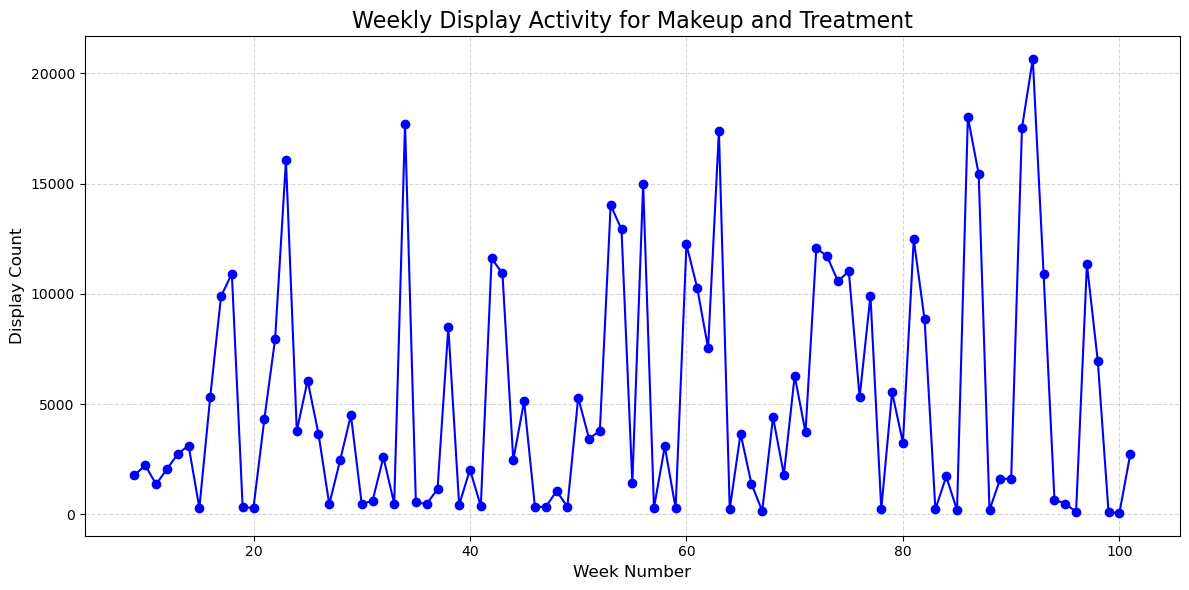

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Join product to causal_data on PRODUCT_ID
causal_product = causal_data.merge(product, on='PRODUCT_ID', how='inner')

# Step 2: Filter for the category - 'COSMETICS' and 'MAKEUP AND TREATMENT'
makeup_and_treatment_data = causal_product[
    (causal_product['DEPARTMENT'] == 'COSMETICS') &
    (causal_product['COMMODITY_DESC'] == 'MAKEUP AND TREATMENT')
]

# Step 3: Aggregate data by WEEK_NO to calculate the sum of display counts
weekly_display_data = makeup_and_treatment_data.groupby('WEEK_NO')['display'].count().reset_index()

# Step 4: Plot the data
plt.figure(figsize=(12, 6))
plt.plot(weekly_display_data['WEEK_NO'], weekly_display_data['display'], marker='o', linestyle='-', color='blue')

# Customize the chart
plt.title('Weekly Display Activity for Makeup and Treatment', fontsize=16)
plt.xlabel('Week Number', fontsize=12)
plt.ylabel('Display Count', fontsize=12)
plt.grid(alpha=0.5, linestyle='--')
plt.tight_layout()

# Show the chart
plt.show()

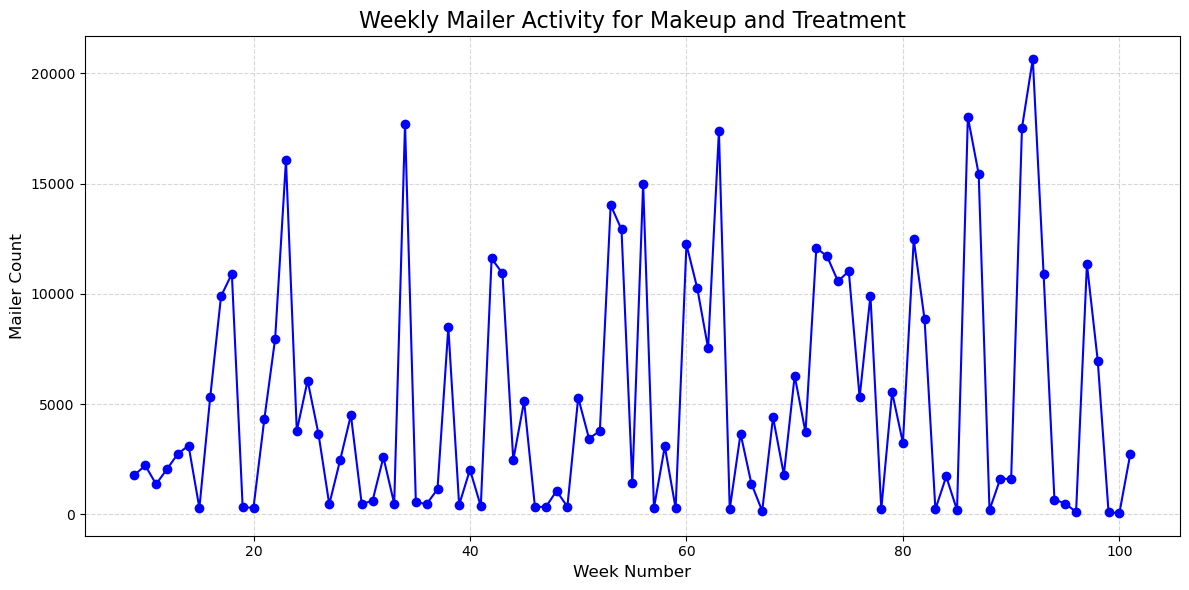

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Join product to causal_data on PRODUCT_ID
causal_product = causal_data.merge(product, on='PRODUCT_ID', how='inner')

# Step 2: Filter for the category - 'COSMETICS' and 'MAKEUP AND TREATMENT'
makeup_and_treatment_data = causal_product[
    (causal_product['DEPARTMENT'] == 'COSMETICS') &
    (causal_product['COMMODITY_DESC'] == 'MAKEUP AND TREATMENT')
]

# Step 3: Aggregate data by WEEK_NO to calculate the sum of mailer counts
weekly_mailer_data = makeup_and_treatment_data.groupby('WEEK_NO')['mailer'].count().reset_index()

# Step 4: Plot the data
plt.figure(figsize=(12, 6))
plt.plot(weekly_mailer_data['WEEK_NO'], weekly_mailer_data['mailer'], marker='o', linestyle='-', color='blue')

# Customize the chart
plt.title('Weekly Mailer Activity for Makeup and Treatment', fontsize=16)
plt.xlabel('Week Number', fontsize=12)
plt.ylabel('Mailer Count', fontsize=12)
plt.grid(alpha=0.5, linestyle='--')
plt.tight_layout()

# Show the chart
plt.show()

# Demographics Exploration

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   classification_1   801 non-null    int64 
 1   classification_2   801 non-null    object
 2   classification_3   801 non-null    int64 
 3   HOMEOWNER_DESC     801 non-null    object
 4   classification_5   801 non-null    int64 
 5   classification_4   801 non-null    object
 6   KID_CATEGORY_DESC  801 non-null    int64 
 7   household_key      801 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 50.2+ KB
None

Summary Statistics:
        classification_1 classification_2  classification_3 HOMEOWNER_DESC  \
count         801.000000              801        801.000000            801   
unique               NaN                3               NaN              5   
top                  NaN                Y               NaN      Homeowner   
freq                 Na

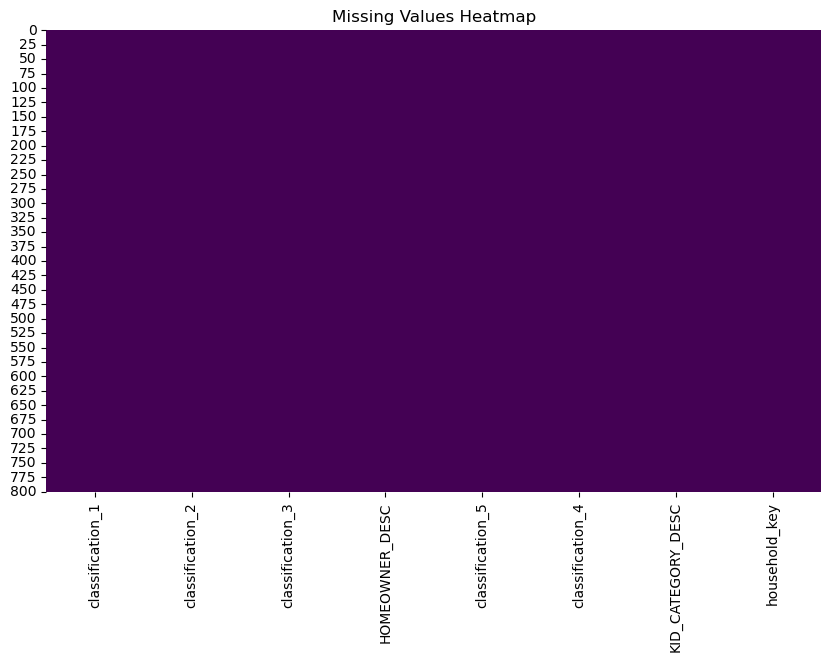


Value Counts for classification_2:
classification_2
Y    344
X    340
Z    117
Name: count, dtype: int64

Value Counts for HOMEOWNER_DESC:
HOMEOWNER_DESC
Homeowner          504
Unknown            233
Renter              42
Probable Renter     11
Probable Owner      11
Name: count, dtype: int64

Value Counts for classification_4:
classification_4
2     318
1     255
3     109
5+     66
4      53
Name: count, dtype: int64


/var/folders/fb/ly6l5n852t73j09dv1k9ndx80000gp/T/ipykernel_92840/3940306116.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=hh_demographic, x=col, order=hh_demographic[col].value_counts().index, palette='Set2')
/var/folders/fb/ly6l5n852t73j09dv1k9ndx80000gp/T/ipykernel_92840/3940306116.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=hh_demographic, x=col, order=hh_demographic[col].value_counts().index, palette='Set2')
/var/folders/fb/ly6l5n852t73j09dv1k9ndx80000gp/T/ipykernel_92840/3940306116.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the 

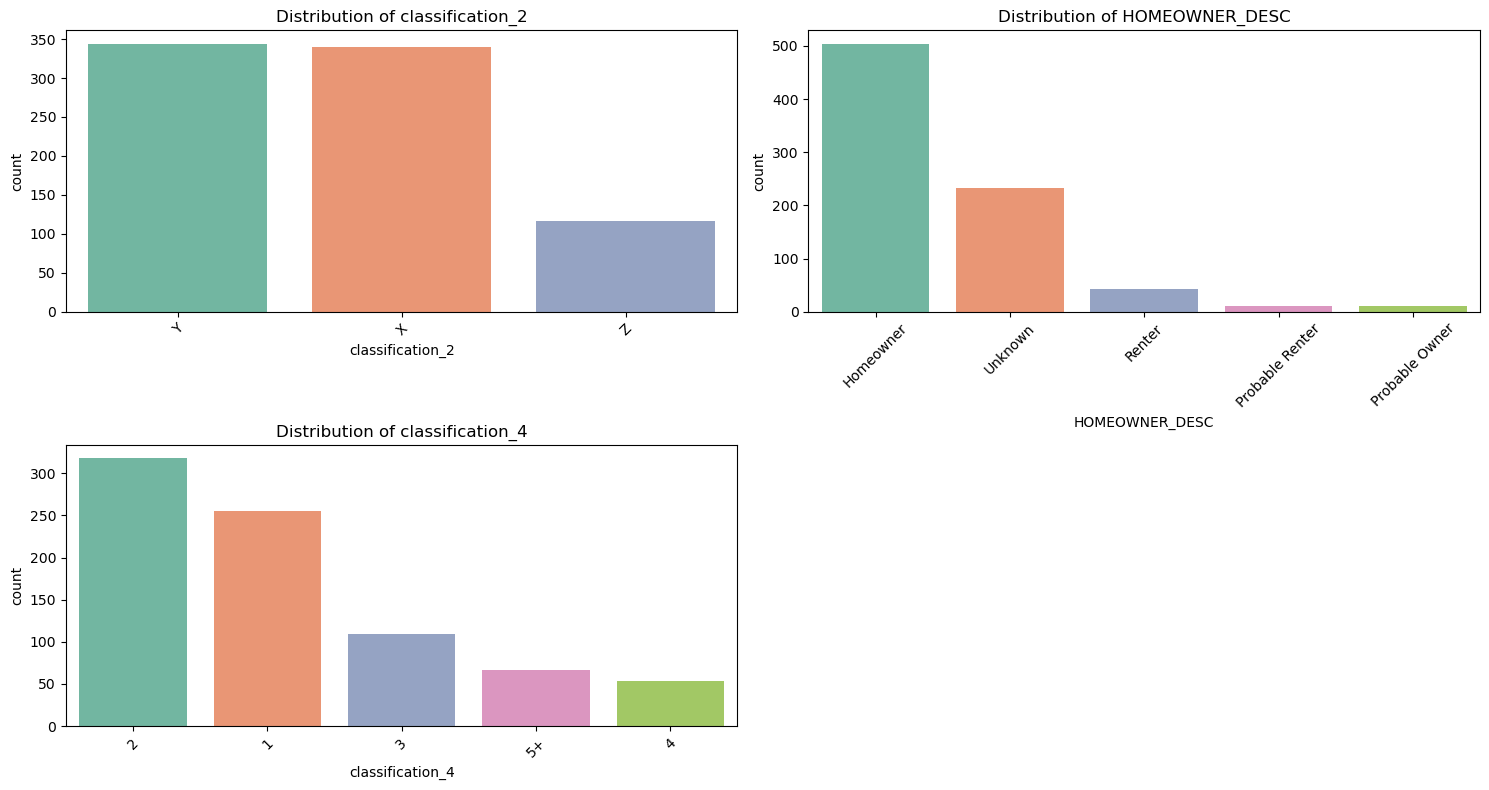


Summary Statistics for Numerical Variables:
       classification_1  classification_3  classification_5  \
count        801.000000        801.000000        801.000000   
mean           3.484395          4.710362          3.907615   
std            1.279675          2.264620          1.363435   
min            1.000000          1.000000          1.000000   
25%            3.000000          3.000000          3.000000   
50%            4.000000          5.000000          4.000000   
75%            4.000000          6.000000          5.000000   
max            6.000000         12.000000          6.000000   

       KID_CATEGORY_DESC  household_key  
count         801.000000     801.000000  
mean            0.550562    1235.176030  
std             0.956688     736.804647  
min             0.000000       1.000000  
25%             0.000000     596.000000  
50%             0.000000    1218.000000  
75%             1.000000    1914.000000  
max             3.000000    2499.000000  


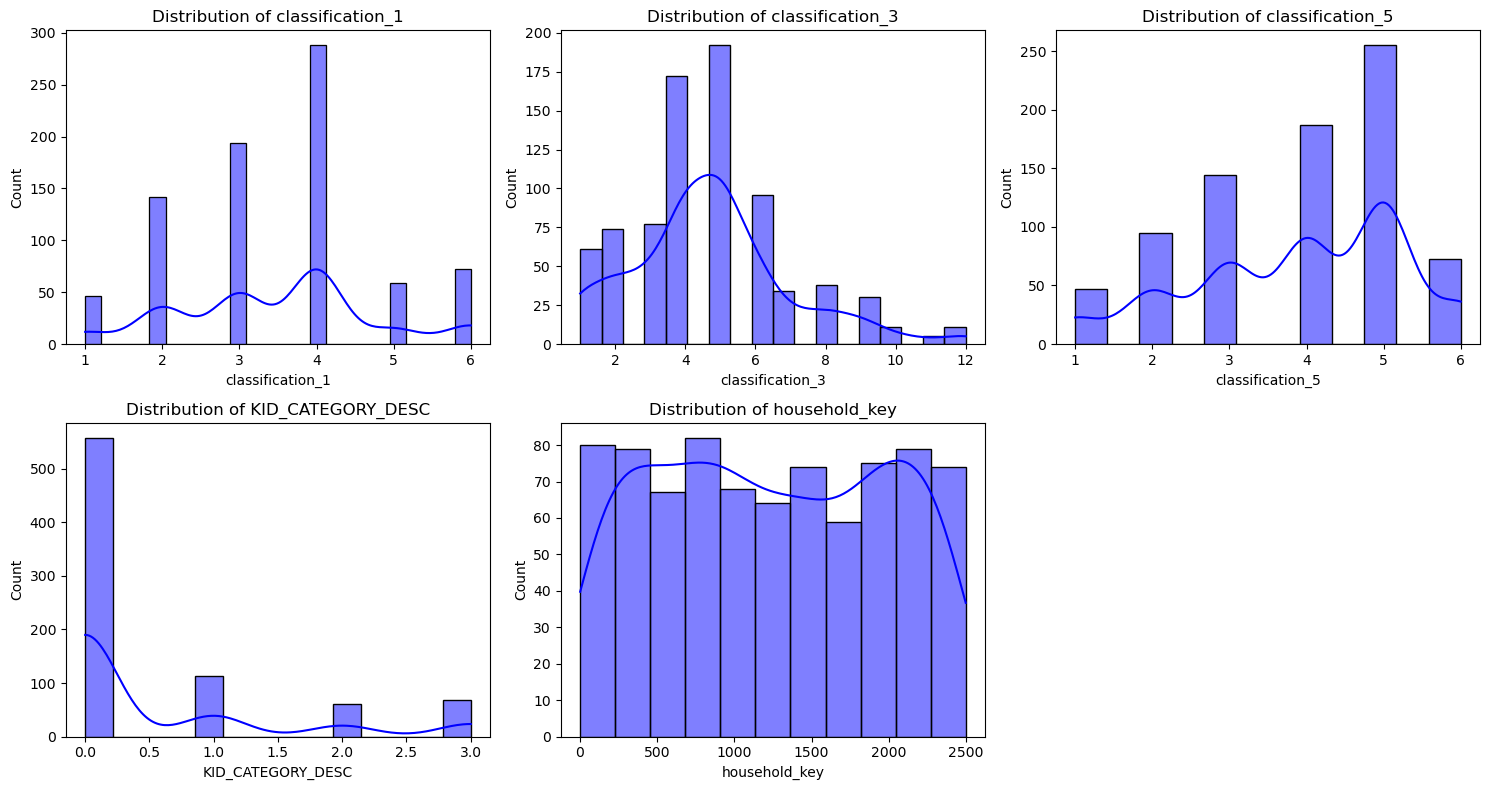

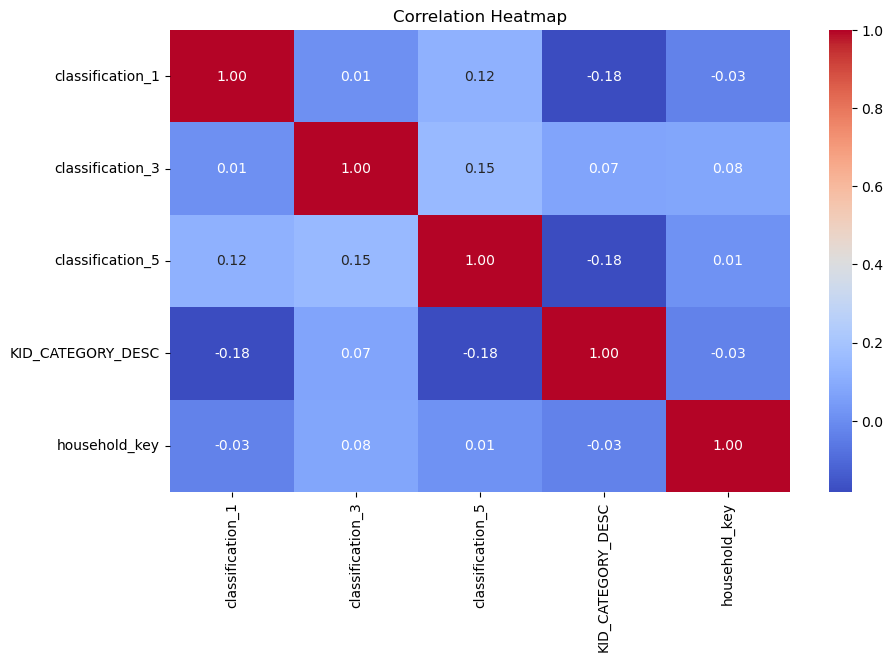


Number of Duplicate Rows: 0

Unique Values in Each Column:
classification_1: 6 unique values
classification_2: 3 unique values
classification_3: 12 unique values
HOMEOWNER_DESC: 5 unique values
classification_5: 6 unique values
classification_4: 5 unique values
KID_CATEGORY_DESC: 4 unique values
household_key: 801 unique values


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Overview of the dataset
print("Dataset Info:")
print(hh_demographic.info())

print("\nSummary Statistics:")
print(hh_demographic.describe(include='all'))

# Step 2: Check for missing values
print("\nMissing Values:")
print(hh_demographic.isnull().sum())

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(hh_demographic.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

# Step 3: Analyze categorical variables
categorical_cols = hh_demographic.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"\nValue Counts for {col}:")
    print(hh_demographic[col].value_counts())

# Plot distributions for categorical variables
plt.figure(figsize=(15, 8))
for i, col in enumerate(categorical_cols, start=1):
    plt.subplot(2, (len(categorical_cols) + 1) // 2, i)
    sns.countplot(data=hh_demographic, x=col, order=hh_demographic[col].value_counts().index, palette='Set2')
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 4: Analyze numerical variables
numerical_cols = hh_demographic.select_dtypes(include=['number']).columns

print("\nSummary Statistics for Numerical Variables:")
print(hh_demographic[numerical_cols].describe())

# Plot histograms for numerical variables
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, start=1):
    plt.subplot(2, (len(numerical_cols) + 1) // 2, i)
    sns.histplot(data=hh_demographic, x=col, kde=True, color='blue')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# Step 5: Analyze relationships between variables
# Correlation heatmap for numerical variables
plt.figure(figsize=(10, 6))
sns.heatmap(hh_demographic[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Step 6: Check for duplicates
duplicates = hh_demographic.duplicated()
print(f"\nNumber of Duplicate Rows: {duplicates.sum()}")

# Step 7: Analyze unique values
print("\nUnique Values in Each Column:")
for col in hh_demographic.columns:
    print(f"{col}: {hh_demographic[col].nunique()} unique values")

# Step 8: Insights
# If specific insights are needed, summarize patterns in categorical and numerical variables


# Demand Forecasting

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Step 2: Aggregate data by week
weekly_data = makeup_and_treatment.groupby('WEEK_NO').agg(
    total_quantity=('QUANTITY', 'sum'),
    total_sales=('SALES_VALUE', 'sum'),
    avg_price=('SALES_VALUE', lambda x: x.sum() / max(len(x), 1))
).reset_index()

# Step 3: Add features
# Add lagged demand (previous week sales)
weekly_data['lag_quantity'] = weekly_data['total_quantity'].shift(1)

makeup_and_treatment_causal_data = weekly_data.merge(causal_data, on=['STORE_ID', 'WEEK_NO'], how='inner')

KeyError: 'STORE_ID'

In [ ]:
# Add promotional data (display and mailer) if available
if 'display' in transaction_product.columns and 'mailer' in transaction_product.columns:
    promo_data = makeup_and_treatment.groupby('WEEK_NO')[['display', 'mailer']].sum().reset_index()
    weekly_data = weekly_data.merge(promo_data, on='WEEK_NO', how='left')

# Fill missing values in features
weekly_data.fillna(0, inplace=True)

# Step 4: Prepare data for modeling
X = weekly_data[['lag_quantity', 'avg_price', 'display', 'mailer']]
y = weekly_data['total_quantity']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Step 5: Train a Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Square Error (RMSE): {rmse}")

# Step 7: Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title("Actual vs Predicted Demand")
plt.xlabel("Test Data Points")
plt.ylabel("Total Quantity")
plt.legend()
plt.grid()
plt.show()

# Optional: Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

In [ ]:
pip install lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.8 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error

# Step 1: Filter data for MAKEUP AND TREATMENT category
makeup_transaction = transaction_data.merge(product, on='PRODUCT_ID', how='left')
makeup_transaction = makeup_transaction[
    (makeup_transaction['DEPARTMENT'] == 'COSMETICS') &
    (makeup_transaction['COMMODITY_DESC'] == 'MAKEUP AND TREATMENT')
]

# Step 2: Aggregate data by WEEK_NO, STORE_ID, and other relevant features
aggregated_data = makeup_transaction.groupby(['WEEK_NO']).agg(
    total_quantity=('QUANTITY', 'sum'),
    total_sales_value=('SALES_VALUE', 'sum'),
    avg_sales_value=('SALES_VALUE', 'mean'),
    total_retail_disc=('RETAIL_DISC', 'sum'),
    avg_retail_disc=('RETAIL_DISC', 'mean'),
    total_coupon_disc=('COUPON_DISC', 'sum'),
    avg_coupon_disc=('COUPON_DISC', 'mean')
).reset_index()

# Step 3: Add additional time-based features
aggregated_data['month'] = (aggregated_data['WEEK_NO'] - 1) // 4 + 1  # Approximate month
aggregated_data['year'] = (aggregated_data['WEEK_NO'] - 1) // 52 + 1  # Approximate year

# Step 4: Create lagging features
aggregated_data['quantity_lag_1'] = aggregated_data['total_quantity'].shift(1)
aggregated_data['quantity_lag_4'] = aggregated_data['total_quantity'].shift(4)
aggregated_data['quantity_lag_8'] = aggregated_data['total_quantity'].shift(8)

# Drop rows with NaN values caused by lagging
aggregated_data = aggregated_data.dropna()

# Step 5: Ignore the first 13 weeks of data and split into train and test
train_data = aggregated_data[(aggregated_data['WEEK_NO'] > 13) & (aggregated_data['WEEK_NO'] <= 91)]
test_data = aggregated_data[aggregated_data['WEEK_NO'] > 91]

# Define the feature and target variables
features = ['month', 'year',
            #'total_sales_value',
            'avg_sales_value',
            'avg_retail_disc',
            'avg_coupon_disc',
            'quantity_lag_1',  # Lagging features
            'quantity_lag_4',
            'quantity_lag_8']
target = 'total_quantity'

X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Convert categorical variables
categorical_vars = ['month', 'year']
for cat_var in categorical_vars:
    X_train[cat_var] = X_train[cat_var].astype('category')
    X_test[cat_var] = X_test[cat_var].astype('category')

# Step 6: Create and train the LightGBM model
model = lgb.LGBMRegressor(objective='mape', random_state=42)
model.fit(X_train, y_train)

# Step 7: Predict on the training set and test set
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Step 8: Evaluate the model
train_mape = np.mean(np.abs(y_train - train_predictions) / y_train) * 100
test_mape = np.mean(np.abs(y_test - test_predictions) / y_test) * 100

print("MAPE for Training Set:", train_mape)
print("MAPE for Test Set:", test_mape)

# Optional: Save predictions for analysis
test_data['predicted_quantity'] = test_predictions
# test_data.to_csv('makeup_demand_forecast_with_lags.csv', index=False)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000017 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 165
[LightGBM] [Info] Number of data points in the train set: 78, number of used features: 8
[LightGBM] [Info] Start training from score 59.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

/var/folders/fb/ly6l5n852t73j09dv1k9ndx80000gp/T/ipykernel_97783/1408918535.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[cat_var] = X_train[cat_var].astype('category')
/var/folders/fb/ly6l5n852t73j09dv1k9ndx80000gp/T/ipykernel_97783/1408918535.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[cat_var] = X_test[cat_var].astype('category')
/var/folders/fb/ly6l5n852t73j09dv1k9ndx80000gp/T/ipykernel_97783/1408918535.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy 

In [ ]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error

# Step 1: Filter data for MAKEUP AND TREATMENT category
makeup_transaction = transaction_data.merge(product, on='PRODUCT_ID', how='left')
makeup_transaction = makeup_transaction[
    (makeup_transaction['DEPARTMENT'] == 'COSMETICS') &
    (makeup_transaction['COMMODITY_DESC'] == 'MAKEUP AND TREATMENT')
]

# Step 2: Aggregate data by WEEK_NO, STORE_ID, and other relevant features
aggregated_data = makeup_transaction.groupby(['WEEK_NO']).agg(
    total_quantity=('QUANTITY', 'sum'),
    total_sales_value=('SALES_VALUE', 'sum'),
    avg_sales_value=('SALES_VALUE', 'mean'),
    total_retail_disc=('RETAIL_DISC', 'sum'),
    avg_retail_disc=('RETAIL_DISC', 'mean'),
    total_coupon_disc=('COUPON_DISC', 'sum'),
    avg_coupon_disc=('COUPON_DISC', 'mean')
).reset_index()

# Step 3: Add additional time-based features
aggregated_data['month'] = (aggregated_data['WEEK_NO'] - 1) // 4 + 1  # Approximate month
aggregated_data['year'] = (aggregated_data['WEEK_NO'] - 1) // 52 + 1  # Approximate year

# Step 4: Ignore the first 13 weeks of data and split into train and test
train_data = aggregated_data[(aggregated_data['WEEK_NO'] > 13) & (aggregated_data['WEEK_NO'] <= 91)]
test_data = aggregated_data[aggregated_data['WEEK_NO'] > 91]

# Define the feature and target variables
features = ['month', 'year',
            'total_sales_value',
            'avg_sales_value',
            #'total_retail_disc',
            'avg_retail_disc',
            #'total_coupon_disc',
            'avg_coupon_disc']
target = 'total_quantity'

X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Convert categorical variables
categorical_vars = ['month', 'year']
for cat_var in categorical_vars:
    X_train[cat_var] = X_train[cat_var].astype('category')
    X_test[cat_var] = X_test[cat_var].astype('category')

# Step 5: Create and train the LightGBM model
model = lgb.LGBMRegressor(objective='mape', random_state=42)
model.fit(X_train, y_train)

# Step 6: Predict on the training set and test set
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Step 7: Evaluate the model
train_mape = np.mean(np.abs(y_train - train_predictions) / y_train) * 100
test_mape = np.mean(np.abs(y_test - test_predictions) / y_test) * 100

print("MAPE for Training Set:", train_mape)
print("MAPE for Test Set:", test_mape)

# Optional: Save predictions for analysis
test_data['predicted_quantity'] = test_predictions
# test_data.to_csv('makeup_demand_forecast.csv', index=False)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000015 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 123
[LightGBM] [Info] Number of data points in the train set: 78, number of used features: 6
[LightGBM] [Info] Start training from score 59.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

/var/folders/fb/ly6l5n852t73j09dv1k9ndx80000gp/T/ipykernel_97783/164244658.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[cat_var] = X_train[cat_var].astype('category')
/var/folders/fb/ly6l5n852t73j09dv1k9ndx80000gp/T/ipykernel_97783/164244658.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[cat_var] = X_test[cat_var].astype('category')
/var/folders/fb/ly6l5n852t73j09dv1k9ndx80000gp/T/ipykernel_97783/164244658.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

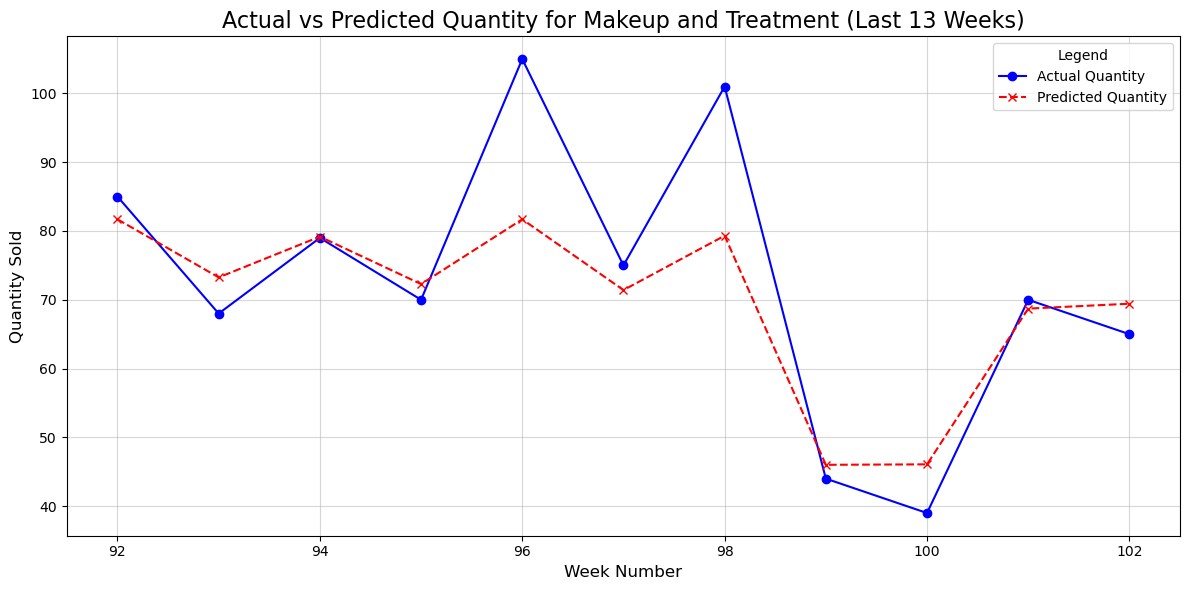

In [ ]:
import matplotlib.pyplot as plt

# Step 8: Visualization of Actual vs. Predicted Values
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(test_data['WEEK_NO'], y_test.values, label='Actual Quantity', marker='o', linestyle='-', color='blue')

# Plot predicted values
plt.plot(test_data['WEEK_NO'], test_data['predicted_quantity'], label='Predicted Quantity', marker='x', linestyle='--', color='red')

# Customize the chart
plt.title('Actual vs Predicted Quantity for Makeup and Treatment (Last 13 Weeks)', fontsize=16)
plt.xlabel('Week Number', fontsize=12)
plt.ylabel('Quantity Sold', fontsize=12)
plt.legend(title='Legend', fontsize=10)
plt.grid(alpha=0.5)
plt.tight_layout()

# Show the chart
plt.show()


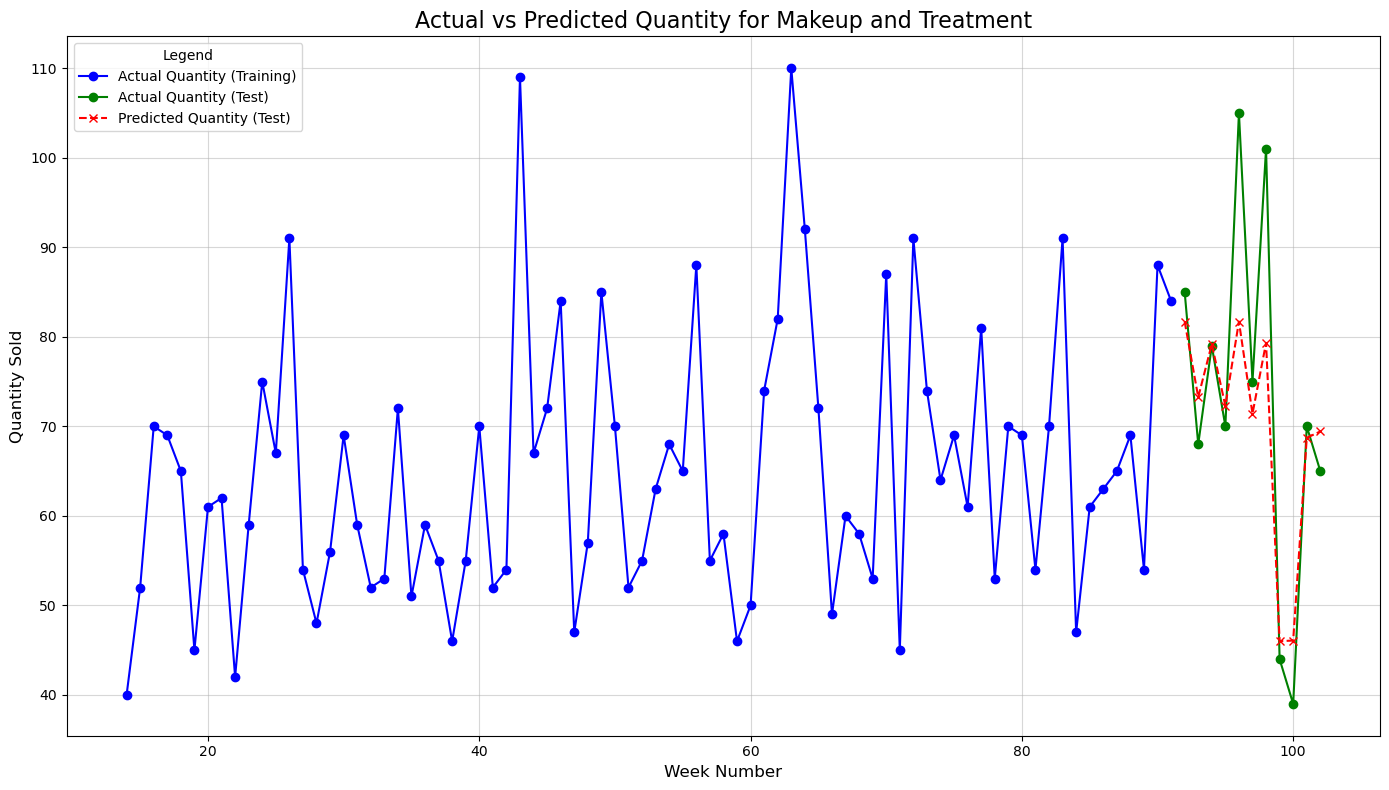

In [ ]:
import matplotlib.pyplot as plt

# Combine training and test data for visualization
train_plot_data = train_data[['WEEK_NO', target]].rename(columns={target: 'Actual Quantity'})
test_plot_data = test_data[['WEEK_NO', target]].rename(columns={target: 'Actual Quantity'})
test_plot_data['Predicted Quantity'] = test_data['predicted_quantity']

# Plot the chart
plt.figure(figsize=(14, 8))

# Plot actual values from training data
plt.plot(train_plot_data['WEEK_NO'], train_plot_data['Actual Quantity'], label='Actual Quantity (Training)',
         marker='o', linestyle='-', color='blue')

# Plot actual values from test data
plt.plot(test_plot_data['WEEK_NO'], test_plot_data['Actual Quantity'], label='Actual Quantity (Test)',
         marker='o', linestyle='-', color='green')

# Plot predicted values from test data
plt.plot(test_plot_data['WEEK_NO'], test_plot_data['Predicted Quantity'], label='Predicted Quantity (Test)',
         marker='x', linestyle='--', color='red')

# Customize the chart
plt.title('Actual vs Predicted Quantity for Makeup and Treatment', fontsize=16)
plt.xlabel('Week Number', fontsize=12)
plt.ylabel('Quantity Sold', fontsize=12)
plt.legend(title='Legend', fontsize=10)
plt.grid(alpha=0.5)
plt.tight_layout()

# Show the chart
plt.show()


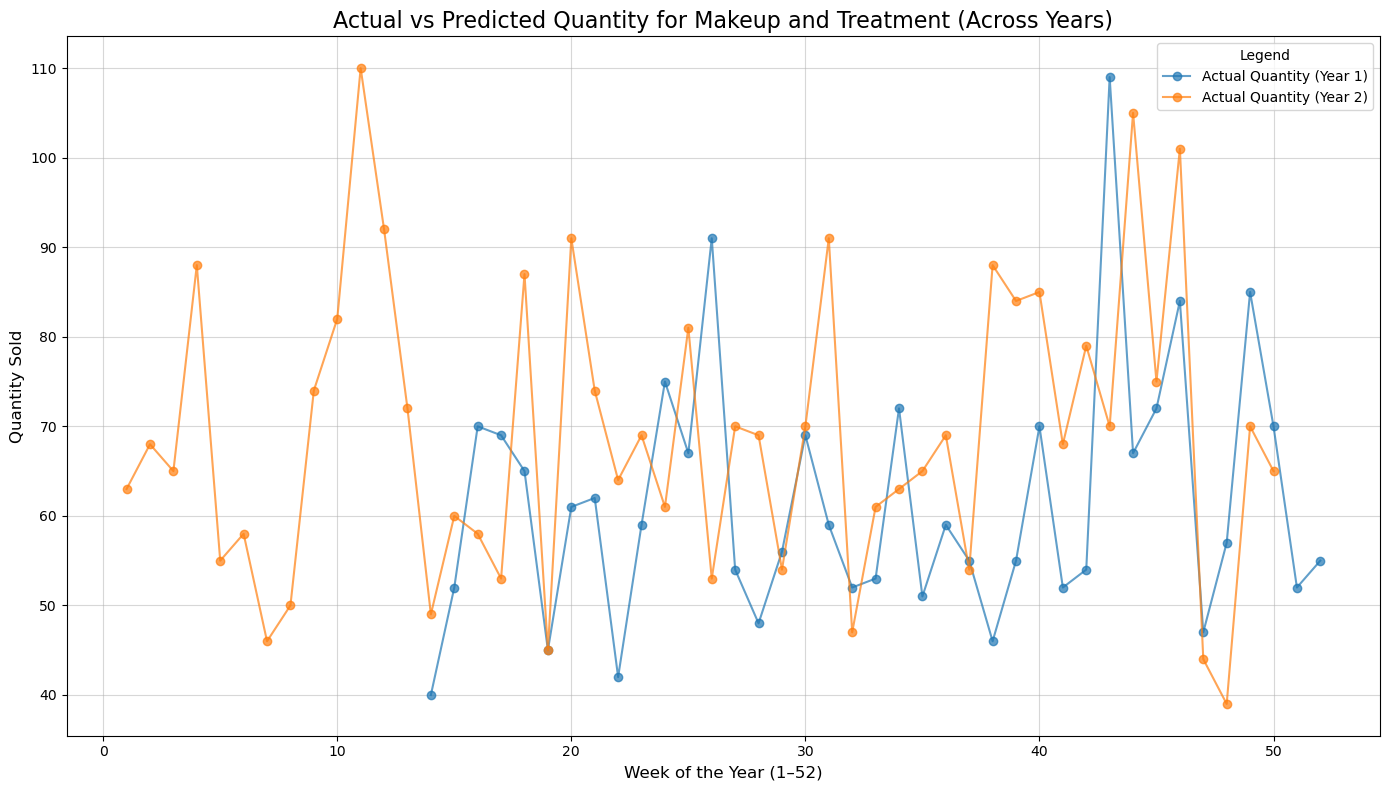

In [ ]:
import matplotlib.pyplot as plt

# Add year and week-of-year columns
train_plot_data['Year'] = (train_plot_data['WEEK_NO'] - 1) // 52 + 1
train_plot_data['Week_of_Year'] = (train_plot_data['WEEK_NO'] - 1) % 52 + 1
test_plot_data['Year'] = (test_plot_data['WEEK_NO'] - 1) // 52 + 1
test_plot_data['Week_of_Year'] = (test_plot_data['WEEK_NO'] - 1) % 52 + 1

# Combine training and test data for visualization
plot_data = pd.concat([train_plot_data, test_plot_data])

# Plot the combined chart
plt.figure(figsize=(14, 8))

# Loop through each year and plot the data
for year in plot_data['Year'].unique():
    year_data = plot_data[plot_data['Year'] == year]

    # Plot actual values
    plt.plot(year_data['Week_of_Year'], year_data['Actual Quantity'],
             label=f'Actual Quantity (Year {year})', marker='o', linestyle='-', alpha=0.7)

    # Plot predicted values if available
    if 'Predicted Quantity' in year_data.columns.any():
        plt.plot(year_data['Week_of_Year'], year_data['Predicted Quantity'],
                 label=f'Predicted Quantity (Year {year})', marker='x', linestyle='--', alpha=0.7)

# Customize the chart
plt.title('Actual vs Predicted Quantity for Makeup and Treatment (Across Years)', fontsize=16)
plt.xlabel('Week of the Year (1–52)', fontsize=12)
plt.ylabel('Quantity Sold', fontsize=12)
plt.legend(title='Legend', fontsize=10, loc='upper right')
plt.grid(alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()


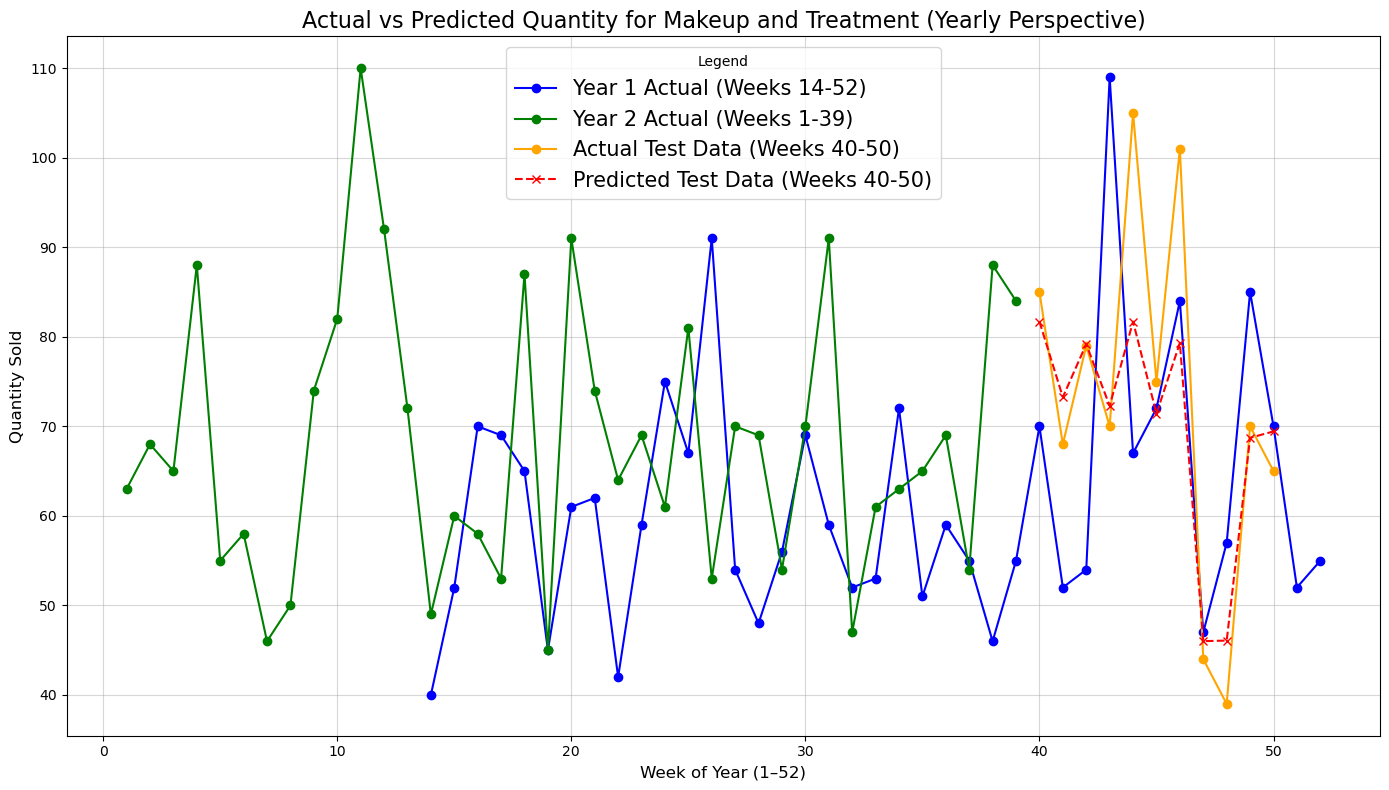

In [ ]:
import matplotlib.pyplot as plt

# Map the weeks into a yearly perspective (1-52)
def map_to_yearly_weeks(week_no):
    return (week_no - 1) % 52 + 1

# Prepare training and test data with yearly week mapping
train_plot_data['Week_of_Year'] = train_plot_data['WEEK_NO'].apply(map_to_yearly_weeks)
test_plot_data['Week_of_Year'] = test_plot_data['WEEK_NO'].apply(map_to_yearly_weeks)

# Split training data into Year 1 (Weeks 14–52) and Year 2 (Weeks 53–91 mapped to Weeks 1–39)
train_year1 = train_plot_data[(train_plot_data['WEEK_NO'] >= 14) & (train_plot_data['WEEK_NO'] <= 52)]
train_year2 = train_plot_data[(train_plot_data['WEEK_NO'] >= 53) & (train_plot_data['WEEK_NO'] <= 91)]

# Split test data (Weeks 92–104 mapped to Weeks 40–52)
test_actual = test_plot_data[['Week_of_Year', 'Actual Quantity']]
test_predicted = test_plot_data[['Week_of_Year', 'Predicted Quantity']]

# Plot the chart
plt.figure(figsize=(14, 8))

# Line 1: Actual training data for Year 1 (Weeks 14–52)
plt.plot(train_year1['Week_of_Year'], train_year1['Actual Quantity'], label='Year 1 Actual (Weeks 14-52)',
         marker='o', linestyle='-', color='blue')

# Line 2: Actual training data for Year 2 (Weeks 53–91, Weeks 1–39 mapped)
plt.plot(train_year2['Week_of_Year'], train_year2['Actual Quantity'], label='Year 2 Actual (Weeks 1-39)',
         marker='o', linestyle='-', color='green')

# Line 3: Actual sales data for Weeks 92–104 (Weeks 40–52 mapped)
plt.plot(test_actual['Week_of_Year'], test_actual['Actual Quantity'], label='Actual Test Data (Weeks 40-50)',
         marker='o', linestyle='-', color='orange')

# Line 4: Predicted sales data for Weeks 92–104 (Weeks 40–52 mapped)
plt.plot(test_predicted['Week_of_Year'], test_predicted['Predicted Quantity'], label='Predicted Test Data (Weeks 40-50)',
         marker='x', linestyle='--', color='red')

# Customize the chart
plt.title('Actual vs Predicted Quantity for Makeup and Treatment (Yearly Perspective)', fontsize=16)
plt.xlabel('Week of Year (1–52)', fontsize=12)
plt.ylabel('Quantity Sold', fontsize=12)
plt.legend(title='Legend', fontsize=15)
plt.grid(alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()


# Regression on coupon data

In [ ]:
import numpy as np
# Step 1: Create makeup_transaction by joining product to transaction_data and filtering for the category

# Step 1: Create makeup_transaction by joining product to transaction_data and filtering for the category
makeup_transaction = transaction_data.merge(product, on='PRODUCT_ID', how='left')
makeup_transaction = makeup_transaction[
    (makeup_transaction['DEPARTMENT'] == 'COSMETICS') &
    (makeup_transaction['COMMODITY_DESC'] == 'MAKEUP AND TREATMENT')
]

makeup_transaction = transaction_data.merge(product, on='PRODUCT_ID', how='left')
makeup_transaction = makeup_transaction[
    (makeup_transaction['DEPARTMENT'] == 'COSMETICS') &
    (makeup_transaction['COMMODITY_DESC'] == 'MAKEUP AND TREATMENT')
]

# Step 2: Left join campaign_table to makeup_transaction on HOUSEHOLD_KEY
makeup_transaction = makeup_transaction.merge(campaign_table, on='household_key', how='left')

# Step 3: Left join campaign_desc to the resulting table from Step 2 on CAMPAIGN
makeup_transaction = makeup_transaction.merge(campaign_desc, on='CAMPAIGN', how='inner')

# Add START_WEEK and END_WEEK columns to campaign_desc
makeup_transaction['START_WEEK'] = np.floor(makeup_transaction['START_DAY'] / 7).astype(int)
makeup_transaction['END_WEEK'] = np.ceil(makeup_transaction['END_DAY'] / 7).astype(int)

# Step 4: Left join coupon_redempt to the resulting table from Step 3 on CAMPAIGN
makeup_transaction = makeup_transaction.merge(coupon_redempt, on=['CAMPAIGN','household_key'] , how='left')

makeup_transaction = makeup_transaction[
    (makeup_transaction['WEEK_NO'] >= makeup_transaction['START_WEEK']) &
    (makeup_transaction['WEEK_NO'] <= makeup_transaction['END_WEEK'])
]

# Step 5: Left join coupon to the resulting table from Step 4 based on COUPON_UPC
master_dataset = makeup_transaction.merge(coupon, on=['COUPON_UPC', 'CAMPAIGN', 'PRODUCT_ID'], how='left')

# Step 2: Group by STORE_ID, WEEK_ID, and SUB_COMMODITY_DESC and calculate the required aggregations
grouped_data = master_dataset.groupby(['STORE_ID', 'WEEK_NO', 'SUB_COMMODITY_DESC']).agg(
    total_quantity=('QUANTITY', 'sum'),
    total_sales_value=('SALES_VALUE', 'sum'),
    avg_sales_value=('SALES_VALUE', 'mean'),
    retail_disc=('RETAIL_DISC', 'sum'),
    avg_retail_disc=('RETAIL_DISC', 'mean'),
    coupon_disc=('COUPON_DISC', 'sum'),
    avg_coupon_disc=('COUPON_DISC', 'mean'),
    total_coupon_match_disc=('COUPON_MATCH_DISC', 'sum'),
    avg_coupon_match_disc=('COUPON_MATCH_DISC', 'mean')
).reset_index()

# Display the resulting grouped data
print(grouped_data.head)

<bound method NDFrame.head of       STORE_ID  WEEK_NO        SUB_COMMODITY_DESC  total_quantity  \
0          289       58  MISC. FIRST AID PRODUCTS               1   
1          292       33                  NAILCARE               1   
2          292       40                BONNE BELL               6   
3          292       41                    REVLON               1   
4          292       55           IMPLEMENTS SETS               2   
...        ...      ...                       ...             ...   
1745     34280       95                 COVERGIRL               2   
1746     34280       95          LOREAL COSMETICS               8   
1747     34280       95                    REVLON               2   
1748     34280       95              SALLY HANSEN               1   
1749     34280       96                    REVLON               1   

      total_sales_value  avg_sales_value  retail_disc  avg_retail_disc  \
0                  1.99         1.990000         0.00             0

In [ ]:
# Step 1: Filter transaction_data for redeemed products
redeemed_products = makeup_transaction[makeup_transaction['COUPON_DISC'] < 0]

# Step 2: Count the number of redeemed products
redeemed_count = redeemed_products['PRODUCT_ID'].count()

# Step 3: Calculate the percentage of redeemed products
total_products = makeup_transaction['COUPON_DISC'].count()
percentage_redeemed = (redeemed_count / total_products) * 100

# Display the results
print(f"Total Products: {total_products}")
print(f"Redeemed Products: {redeemed_count}")
print(f"Percentage Redeemed: {percentage_redeemed:.2f}%")

# Optional: Save the redeemed product details for further analysis
# redeemed_products.to_csv('redeemed_products.csv', index=False)

Total Products: 4340
Redeemed Products: 138
Percentage Redeemed: 3.18%


In [ ]:
import statsmodels.formula.api as smf
import pandas as pd

# Step 2: Preprocess the dataset
# Handle missing values
grouped_data = grouped_data.fillna(0)  # Replace NaNs with 0 for simplicity

# Select relevant features (you can customize this based on domain knowledge)
# For simplicity, using all numeric and categorical variables directly
# Rename columns to avoid special characters in formula strings
grouped_data.columns = grouped_data.columns.str.replace('-', '_').str.replace(' ', '_')

# Step 3: Create a formula
# Include relevant predictors, e.g., SALES_VALUE + RETAIL_DISC + COUPON_DISC
formula = 'total_quantity ~ retail_disc + coupon_disc '

# Step 4: Fit the regression model
model = smf.ols(formula=formula, data=grouped_data).fit()

# Step 5: Evaluate the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         total_quantity   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     1607.
Date:                Sun, 08 Dec 2024   Prob (F-statistic):               0.00
Time:                        19:00:56   Log-Likelihood:                -3826.8
No. Observations:                1750   AIC:                             7660.
Df Residuals:                    1747   BIC:                             7676.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.5480      0.056     27.650      

# Market Basket

In [ ]:
import pandas as pd
from itertools import combinations
from collections import Counter

# Step 1: Filter transactions for Maybelline products
maybelline_transactions = transaction_data.merge(product, on='PRODUCT_ID', how='inner')
maybelline_transactions = maybelline_transactions[
    (maybelline_transactions['DEPARTMENT'] == 'COSMETICS') &
    (maybelline_transactions['COMMODITY_DESC'] == 'MAKEUP AND TREATMENT') &
    (maybelline_transactions['SUB_COMMODITY_DESC'] == 'MAYBELLINE')  # Filter for Maybelline products
]

# Step 2: Get all basket_ids containing Maybelline products
maybelline_baskets = maybelline_transactions['BASKET_ID'].unique()

# Step 3: Get all transactions for baskets containing Maybelline products
all_transactions = transaction_data[transaction_data['BASKET_ID'].isin(maybelline_baskets)]
all_transactions = all_transactions.merge(product, on='PRODUCT_ID', how='inner')

# Step 4: Group products by basket_id
basket_products = all_transactions.groupby('BASKET_ID')['PRODUCT_ID'].apply(list)

# Step 5: Find product pairs frequently bought together
pair_counts = Counter()
for products in basket_products:
    for pair in combinations(products, 2):  # Generate all pairs of products in a basket
        pair_counts[tuple(sorted(pair))] += 1

# Step 6: Filter for pairs containing Maybelline products
maybelline_product_ids = maybelline_transactions['PRODUCT_ID'].unique()
maybelline_pairs = [(pair, count) for pair, count in pair_counts.items() if any(p in maybelline_product_ids for p in pair)]

# Step 7: Create a DataFrame for analysis
maybelline_pair_df = pd.DataFrame(maybelline_pairs, columns=['Product_Pair', 'Count'])

# Step 8: Find the most frequent item bought with each Maybelline product
results = []
for product_id in maybelline_product_ids:
    # Filter for pairs involving this Maybelline product
    product_pairs = maybelline_pair_df[maybelline_pair_df['Product_Pair'].apply(lambda x: product_id in x)]

    # Skip if no pairs are found
    if product_pairs.empty:
        continue

    # Calculate total occurrences of the Maybelline product
    total_occurrences = product_pairs['Count'].sum()

    # Add a column for the other product in the pair
    product_pairs['Other_Product'] = product_pairs['Product_Pair'].apply(lambda x: x[1] if x[0] == product_id else x[0])

    # Find the most frequent pair
    most_frequent = product_pairs.sort_values(by='Count', ascending=False).iloc[0]

    # Calculate the percentage
    percentage = (most_frequent['Count'] / total_occurrences) * 100

    # Store the result
    results.append({
        'Maybelline_Product': product_id,
        'Most_Frequent_Product': most_frequent['Other_Product'],
        #'Count': most_frequent['Count'],
        'Percentage': percentage
    })

# Step 9: Convert results to a DataFrame
result_df = pd.DataFrame(results)

# Display the results
print(result_df)

# Optional: Save results to a CSV
result_df.to_csv('maybelline_market_basket_analysis.csv', index=False)

/var/folders/fb/ly6l5n852t73j09dv1k9ndx80000gp/T/ipykernel_97783/1546744548.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_pairs['Other_Product'] = product_pairs['Product_Pair'].apply(lambda x: x[1] if x[0] == product_id else x[0])
/var/folders/fb/ly6l5n852t73j09dv1k9ndx80000gp/T/ipykernel_97783/1546744548.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_pairs['Other_Product'] = product_pairs['Product_Pair'].apply(lambda x: x[1] if x[0] == product_id else x[0])
/var/folders/fb/ly6l

     Maybelline_Product  Most_Frequent_Product  Percentage
0               9796730                1137808    2.083333
1               1060119                 824072    7.692308
2                915800                 830795   25.000000
3                923552                1101706    2.000000
4               6396131                 849330    4.166667
..                  ...                    ...         ...
497             9530255                  34873   25.000000
498             1102188                 866540   16.666667
499            10456573                 840890   12.500000
500            10457517                 840890   12.500000
501            17329265                 819400    2.631579

[502 rows x 3 columns]


/var/folders/fb/ly6l5n852t73j09dv1k9ndx80000gp/T/ipykernel_97783/1546744548.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_pairs['Other_Product'] = product_pairs['Product_Pair'].apply(lambda x: x[1] if x[0] == product_id else x[0])
/var/folders/fb/ly6l5n852t73j09dv1k9ndx80000gp/T/ipykernel_97783/1546744548.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_pairs['Other_Product'] = product_pairs['Product_Pair'].apply(lambda x: x[1] if x[0] == product_id else x[0])
/var/folders/fb/ly6l

In [ ]:
import pandas as pd
from itertools import combinations
from collections import Counter

# Step 1: Filter transactions for Maybelline products
maybelline_transactions = transaction_data.merge(product, on='PRODUCT_ID', how='inner')
maybelline_transactions = maybelline_transactions[
    (maybelline_transactions['DEPARTMENT'] == 'COSMETICS') &
    (maybelline_transactions['COMMODITY_DESC'] == 'MAKEUP AND TREATMENT') &
    (maybelline_transactions['SUB_COMMODITY_DESC'] == 'MAYBELLINE')  # Filter for Maybelline products
]

# Step 2: Get all basket_ids containing Maybelline products
maybelline_baskets = maybelline_transactions['BASKET_ID'].unique()

# Step 3: Get all transactions for baskets containing Maybelline products
all_transactions = transaction_data[transaction_data['BASKET_ID'].isin(maybelline_baskets)]
all_transactions = all_transactions.merge(product, on='PRODUCT_ID', how='inner')

# Step 4: Group products by basket_id
basket_products = all_transactions.groupby('BASKET_ID')['PRODUCT_ID'].apply(list)

# Step 5: Find product pairs frequently bought together
pair_counts = Counter()
for products in basket_products:
    for pair in combinations(products, 2):  # Generate all pairs of products in a basket
        pair_counts[tuple(sorted(pair))] += 1

# Step 6: Filter for pairs containing Maybelline products
maybelline_product_ids = maybelline_transactions['PRODUCT_ID'].unique()
maybelline_pairs = [(pair, count) for pair, count in pair_counts.items() if any(p in maybelline_product_ids for p in pair)]

# Step 7: Create a DataFrame for analysis
maybelline_pair_df = pd.DataFrame(maybelline_pairs, columns=['Product_Pair', 'Count'])

# Step 8: Find the most frequent item bought with each Maybelline product
results = []
for product_id in maybelline_product_ids:
    # Filter for pairs involving this Maybelline product
    product_pairs = maybelline_pair_df[maybelline_pair_df['Product_Pair'].apply(lambda x: product_id in x)]

    # Calculate total occurrences of the Maybelline product
    total_occurrences = product_pairs['Count'].sum()

    # Find the most frequent item bought with this product
    product_pairs['Other_Product'] = product_pairs['Product_Pair'].apply(lambda x: x[1] if x[0] == product_id else x[0])
    most_frequent = product_pairs.sort_values(by='Count', ascending=False).iloc[0]

    # Calculate the percentage
    percentage = (most_frequent['Count'] / total_occurrences) * 100

    # Store the result
    results.append({
        'Maybelline_Product': product_id,
        'Most_Frequent_Product': most_frequent['Other_Product'],
        'Count': most_frequent['Count'],
        'Percentage': percentage
    })

# Step 9: Convert results to a DataFrame
result_df = pd.DataFrame(results)

# Display the results
print(result_df)

# Optional: Save results to a CSV
# result_df.to_csv('maybelline_market_basket_analysis.csv', index=False)

/var/folders/fb/ly6l5n852t73j09dv1k9ndx80000gp/T/ipykernel_97783/866568261.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_pairs['Other_Product'] = product_pairs['Product_Pair'].apply(lambda x: x[1] if x[0] == product_id else x[0])
/var/folders/fb/ly6l5n852t73j09dv1k9ndx80000gp/T/ipykernel_97783/866568261.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_pairs['Other_Product'] = product_pairs['Product_Pair'].apply(lambda x: x[1] if x[0] == product_id else x[0])
/var/folders/fb/ly6l5n

IndexError: single positional indexer is out-of-bounds

In [ ]:
import pandas as pd
from itertools import combinations
from collections import Counter

# Step 1: Filter transactions for makeup products
makeup_transactions = transaction_data.merge(product, on='PRODUCT_ID', how='inner')
makeup_transactions = makeup_transactions[
    (makeup_transactions['DEPARTMENT'] == 'COSMETICS') &
    (makeup_transactions['COMMODITY_DESC'] == 'MAKEUP AND TREATMENT')
]

# Step 2: Get all basket_ids containing makeup products
makeup_baskets = makeup_transactions['BASKET_ID'].unique()

# Step 3: Get all transactions for baskets containing makeup products
all_transactions = transaction_data[transaction_data['BASKET_ID'].isin(makeup_baskets)]
all_transactions = all_transactions.merge(product, on='PRODUCT_ID', how='inner')

# Step 4: Group products by basket_id
basket_products = all_transactions.groupby('BASKET_ID')['PRODUCT_ID'].apply(list)

# Step 5: Find product pairs frequently bought together
pair_counts = Counter()
for products in basket_products:
    for pair in combinations(products, 2):  # Generate all pairs of products in a basket
        pair_counts[tuple(sorted(pair))] += 1

# Step 6: Convert pair counts to a DataFrame for analysis
pair_df = pd.DataFrame(pair_counts.items(), columns=['Product_Pair', 'Count']).sort_values(by='Count', ascending=False)

# Display top product pairs frequently bought together with makeup
print(pair_df.head(10))

# Optional: Save the pair data for future analysis
# pair_df.to_csv('product_pairs_with_makeup.csv', index=False)


             Product_Pair  Count
19692  (1029743, 1082185)    107
8134    (981760, 1082185)     82
15264  (1082185, 1127831)     81
70806   (951590, 1082185)     75
19110   (866211, 1082185)     71
2517    (862349, 1082185)     68
23659  (1082185, 1126899)     66
663     (995242, 1082185)     66
3759    (961554, 1082185)     66
989    (1070820, 1082185)     62


In [ ]:
import pandas as pd
from itertools import combinations
from collections import Counter

# Step 1: Filter transactions for makeup products
makeup_transactions = transaction_data.merge(product, on='PRODUCT_ID', how='inner')
makeup_transactions = makeup_transactions[
    (makeup_transactions['DEPARTMENT'] == 'COSMETICS') &
    (makeup_transactions['COMMODITY_DESC'] == 'MAKEUP AND TREATMENT')
]

# Step 2: Get all basket_ids containing makeup products
makeup_baskets = makeup_transactions['BASKET_ID'].unique()

# Step 3: Get all transactions for baskets containing makeup products and filter only relevant items
all_transactions = transaction_data[transaction_data['BASKET_ID'].isin(makeup_baskets)]
all_transactions = all_transactions.merge(product, on='PRODUCT_ID', how='inner')

# Filter only items within the "COSMETICS" department or "MAKEUP AND TREATMENT" category
all_transactions = all_transactions[
    (all_transactions['DEPARTMENT'] == 'COSMETICS') &
    (all_transactions['COMMODITY_DESC'] == 'MAKEUP AND TREATMENT')
]

# Step 4: Group SUB_COMMODITY_DESC by basket_id
basket_products = all_transactions.groupby('BASKET_ID')['SUB_COMMODITY_DESC'].apply(list)

# Step 5: Find product pairs frequently bought together
pair_counts = Counter()
for products in basket_products:
    for pair in combinations(products, 2):  # Generate all pairs of products in a basket
        pair_counts[tuple(sorted(pair))] += 1

# Step 6: Convert pair counts to a DataFrame for analysis
pair_df = pd.DataFrame(pair_counts.items(), columns=['Product_Pair', 'Count']).sort_values(by='Count', ascending=False)

# Display top product pairs frequently bought together with makeup
print(pair_df.head(10))

# Optional: Save the pair data for future analysis
# pair_df.to_csv('filtered_product_pairs_with_makeup.csv', index=False)


                            Product_Pair  Count
22                (COVERGIRL, COVERGIRL)    474
16              (MAYBELLINE, MAYBELLINE)    450
2                (COVERGIRL, MAYBELLINE)    257
12                      (REVLON, REVLON)    224
4   (LOREAL COSMETICS, LOREAL COSMETICS)    144
27                   (COVERGIRL, REVLON)    135
11         (COVERGIRL, LOREAL COSMETICS)     98
0           (SALLY HANSEN, SALLY HANSEN)     94
47            (LOREAL COSMETICS, REVLON)     93
3     (IMPLEMENTS SETS, IMPLEMENTS SETS)     91
